# Libraries and Loading of Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb
import lightgbm as lgb
import datetime as dt
import calendar,warnings,itertools,matplotlib,keras,shutil
import tensorflow as tf
import statsmodels.api as sm
import streamlit as st
import plotly.express as px
import plotly.graph_objects as go\
from plotly.subplots import make_subplots
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from datetime import datetime
from sklearn.model_selection import train_test_split,cross_val_score, cross_val_predict
from sklearn import svm,metrics,tree,preprocessing,linear_model
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Ridge,LinearRegression,LogisticRegression,ElasticNet, Lasso
from sklearn.ensemble import RandomForestRegressor,RandomForestClassifier, GradientBoostingRegressor,BaggingClassifier,ExtraTreesClassifier
from sklearn.metrics import accuracy_score,mean_squared_error,recall_score,confusion_matrix,f1_score,roc_curve, auc
from sklearn.datasets import load_iris,make_regression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.kernel_ridge import KernelRidge
from keras import Sequential
from keras.layers import Dense
from IPython.core import display as ICD
# from tensorflow_core.estimator import inputs

#Hiding the warnings
warnings.filterwarnings('ignore') 

In [15]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


DEPRECATION: mermaid 0.3.2 has a non-standard dependency specifier torch>=1.7torchvision. pip 24.1 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of mermaid or contact the author to suggest that they release a version with a conforming dependency specifiers. Discussion can be found at https://github.com/pypa/pip/issues/12063


In [2]:
pip list

Package                           Version
--------------------------------- ------------------
absl-py                           2.1.0
aext-assistant                    4.0.15
aext-assistant-server             4.0.15
aext-core                         4.0.15
aext-core-server                  4.0.15
aext-panels                       4.0.15
aext-panels-server                4.0.15
aext-share-notebook               4.0.15
aext-share-notebook-server        4.0.15
aext-shared                       4.0.15
aiobotocore                       2.12.3
aiohttp                           3.9.5
aioitertools                      0.7.1
aiosignal                         1.2.0
alabaster                         0.7.16
altair                            5.0.1
anaconda-anon-usage               0.4.4
anaconda-catalogs                 0.2.0
anaconda-client                   1.12.3
anaconda-cloud-auth               0.5.1
anaconda-navigator                2.6.3
anaconda-project                  0.11.1
annotated-ty

In [427]:
#Importing Dataset using pandas
dataset=pd.read_csv("DataCoSupplyChainDataset.csv", header= 0, encoding= 'unicode_escape')
dataset.head(5)# Checking 5 rows in dataset

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,...,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Image,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,2/3/2018 22:56,Standard Class
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/18/2018 12:27,Standard Class
2,CASH,4,4,-247.779999,309.720001,Shipping on time,0,73,Sporting Goods,San Jose,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/17/2018 12:06,Standard Class
3,DEBIT,3,4,22.860001,304.809998,Advance shipping,0,73,Sporting Goods,Los Angeles,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/16/2018 11:45,Standard Class
4,PAYMENT,2,4,134.210007,298.250000,Advance shipping,0,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/15/2018 11:24,Standard Class


In [428]:
dataset_header=pd.read_csv("DescriptionDataCoSupplyChain.csv", header= 0, encoding= 'unicode_escape')
dataset_header

,FIELDS,DESCRIPTION
0,Type,: Type of transaction made
1,Days for shipping (real),: Actual shipping days of the purchased product
2,Days for shipment (scheduled),: Days of scheduled delivery of the purchased...
3,Benefit per order,: Earnings per order placed
4,Sales per customer,: Total sales per customer made per customer
5,Delivery Status,: Delivery status of orders: Advance shipping...
6,Late_delivery_risk,: Categorical variable that indicates if send...
7,Category Id,: Product category code
8,Category Name,: Description of the product category
9,Customer City,: City where the customer made the purchase


# Data Cleaning and IDA

In [431]:
dataset.shape

(180519, 53)

In [433]:
dataset.apply(lambda x: sum(x.isnull())) #Checking missing values

Type                                  0
Days for shipping (real)              0
Days for shipment (scheduled)         0
Benefit per order                     0
Sales per customer                    0
Delivery Status                       0
Late_delivery_risk                    0
Category Id                           0
Category Name                         0
Customer City                         0
Customer Country                      0
Customer Email                        0
Customer Fname                        0
Customer Id                           0
Customer Lname                        8
Customer Password                     0
Customer Segment                      0
Customer State                        0
Customer Street                       0
Customer Zipcode                      3
Department Id                         0
Department Name                       0
Latitude                              0
Longitude                             0
Market                                0


### The data contains missing values in Customer Last Name, Product Description, Order Zipcode, and Customer Zipcode, which should be addressed before analysis. Additionally, to prevent confusion from customers sharing the same first or last names, a new column for "Customer Full Name" will be created.

In [436]:
# Adding first name and last name together to create new column
dataset['Customer Full Name'] = dataset['Customer Fname'].astype(str)+dataset['Customer Lname'].astype(str)

In [438]:
# To make it easier for analysis some unimportant columns are dropped
data=dataset.drop(['Customer Email','Product Status','Customer Password','Customer Street','Customer Fname','Customer Lname',
           'Latitude','Longitude','Product Description','Product Image','Order Zipcode','shipping date (DateOrders)'],axis=1)
data.shape

(180519, 42)

### There are three missing values in the Customer Zipcode column. As these zip codes are not critical, they will be replaced with zero before data analysis.

In [441]:
data['Customer Zipcode']=data['Customer Zipcode'].fillna(0)#Filling NaN columns with zero

In [443]:
data.head()

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,...,Order Profit Per Order,Order Region,Order State,Order Status,Product Card Id,Product Category Id,Product Name,Product Price,Shipping Mode,Customer Full Name
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,73,Sporting Goods,Caguas,...,91.250000,Southeast Asia,Java Occidental,COMPLETE,1360,73,Smart watch,327.75,Standard Class,CallyHolloway
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,73,Sporting Goods,Caguas,...,-249.089996,South Asia,Rajastán,PENDING,1360,73,Smart watch,327.75,Standard Class,IreneLuna
2,CASH,4,4,-247.779999,309.720001,Shipping on time,0,73,Sporting Goods,San Jose,...,-247.779999,South Asia,Rajastán,CLOSED,1360,73,Smart watch,327.75,Standard Class,GillianMaldonado
3,DEBIT,3,4,22.860001,304.809998,Advance shipping,0,73,Sporting Goods,Los Angeles,...,22.860001,Oceania,Queensland,COMPLETE,1360,73,Smart watch,327.75,Standard Class,TanaTate
4,PAYMENT,2,4,134.210007,298.250000,Advance shipping,0,73,Sporting Goods,Caguas,...,134.210007,Oceania,Queensland,PENDING_PAYMENT,1360,73,Smart watch,327.75,Standard Class,OrliHendricks


In [445]:
data.describe()

,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Late_delivery_risk,Category Id,Customer Id,Customer Zipcode,Department Id,Order Customer Id,...,Order Item Id,Order Item Product Price,Order Item Profit Ratio,Order Item Quantity,Sales,Order Item Total,Order Profit Per Order,Product Card Id,Product Category Id,Product Price
count,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,...,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000
mean,3.497654,2.931847,21.974989,183.107609,0.548291,31.851451,6691.379495,35920.529950,5.443460,6691.379495,...,90260.000000,141.232550,0.120647,2.127638,203.772096,183.107609,21.974989,692.509764,31.851451,141.232550
std,1.623722,1.374449,104.433526,120.043670,0.497664,15.640064,4162.918106,37542.434755,1.629246,4162.918106,...,52111.490959,139.732492,0.466796,1.453451,132.273077,120.043670,104.433526,336.446807,15.640064,139.732492
min,0.000000,0.000000,-4274.979980,7.490000,0.000000,2.000000,1.000000,0.000000,2.000000,1.000000,...,1.000000,9.990000,-2.750000,1.000000,9.990000,7.490000,-4274.979980,19.000000,2.000000,9.990000
25%,2.000000,2.000000,7.000000,104.379997,0.000000,18.000000,3258.500000,725.000000,4.000000,3258.500000,...,45130.500000,50.000000,0.080000,1.000000,119.980003,104.379997,7.000000,403.000000,18.000000,50.000000
50%,3.000000,4.000000,31.520000,163.990005,1.000000,29.000000,6457.000000,19380.000000,5.000000,6457.000000,...,90260.000000,59.990002,0.270000,1.000000,199.919998,163.990005,31.520000,627.000000,29.000000,59.990002
75%,5.000000,4.000000,64.800003,247.399994,1.000000,45.000000,9779.000000,78207.000000,7.000000,9779.000000,...,135389.500000,199.990005,0.360000,3.000000,299.950012,247.399994,64.800003,1004.000000,45.000000,199.990005
max,6.000000,4.000000,911.799988,1939.989990,1.000000,76.000000,20757.000000,99205.000000,12.000000,20757.000000,...,180519.000000,1999.989990,0.500000,5.000000,1999.989990,1939.989990,911.799988,1363.000000,76.000000,1999.989990


In [447]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180519 entries, 0 to 180518
Data columns (total 42 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Type                           180519 non-null  object 
 1   Days for shipping (real)       180519 non-null  int64  
 2   Days for shipment (scheduled)  180519 non-null  int64  
 3   Benefit per order              180519 non-null  float64
 4   Sales per customer             180519 non-null  float64
 5   Delivery Status                180519 non-null  object 
 6   Late_delivery_risk             180519 non-null  int64  
 7   Category Id                    180519 non-null  int64  
 8   Category Name                  180519 non-null  object 
 9   Customer City                  180519 non-null  object 
 10  Customer Country               180519 non-null  object 
 11  Customer Id                    180519 non-null  int64  
 12  Customer Segment              

# Data Visualization and EDA

<Axes: >

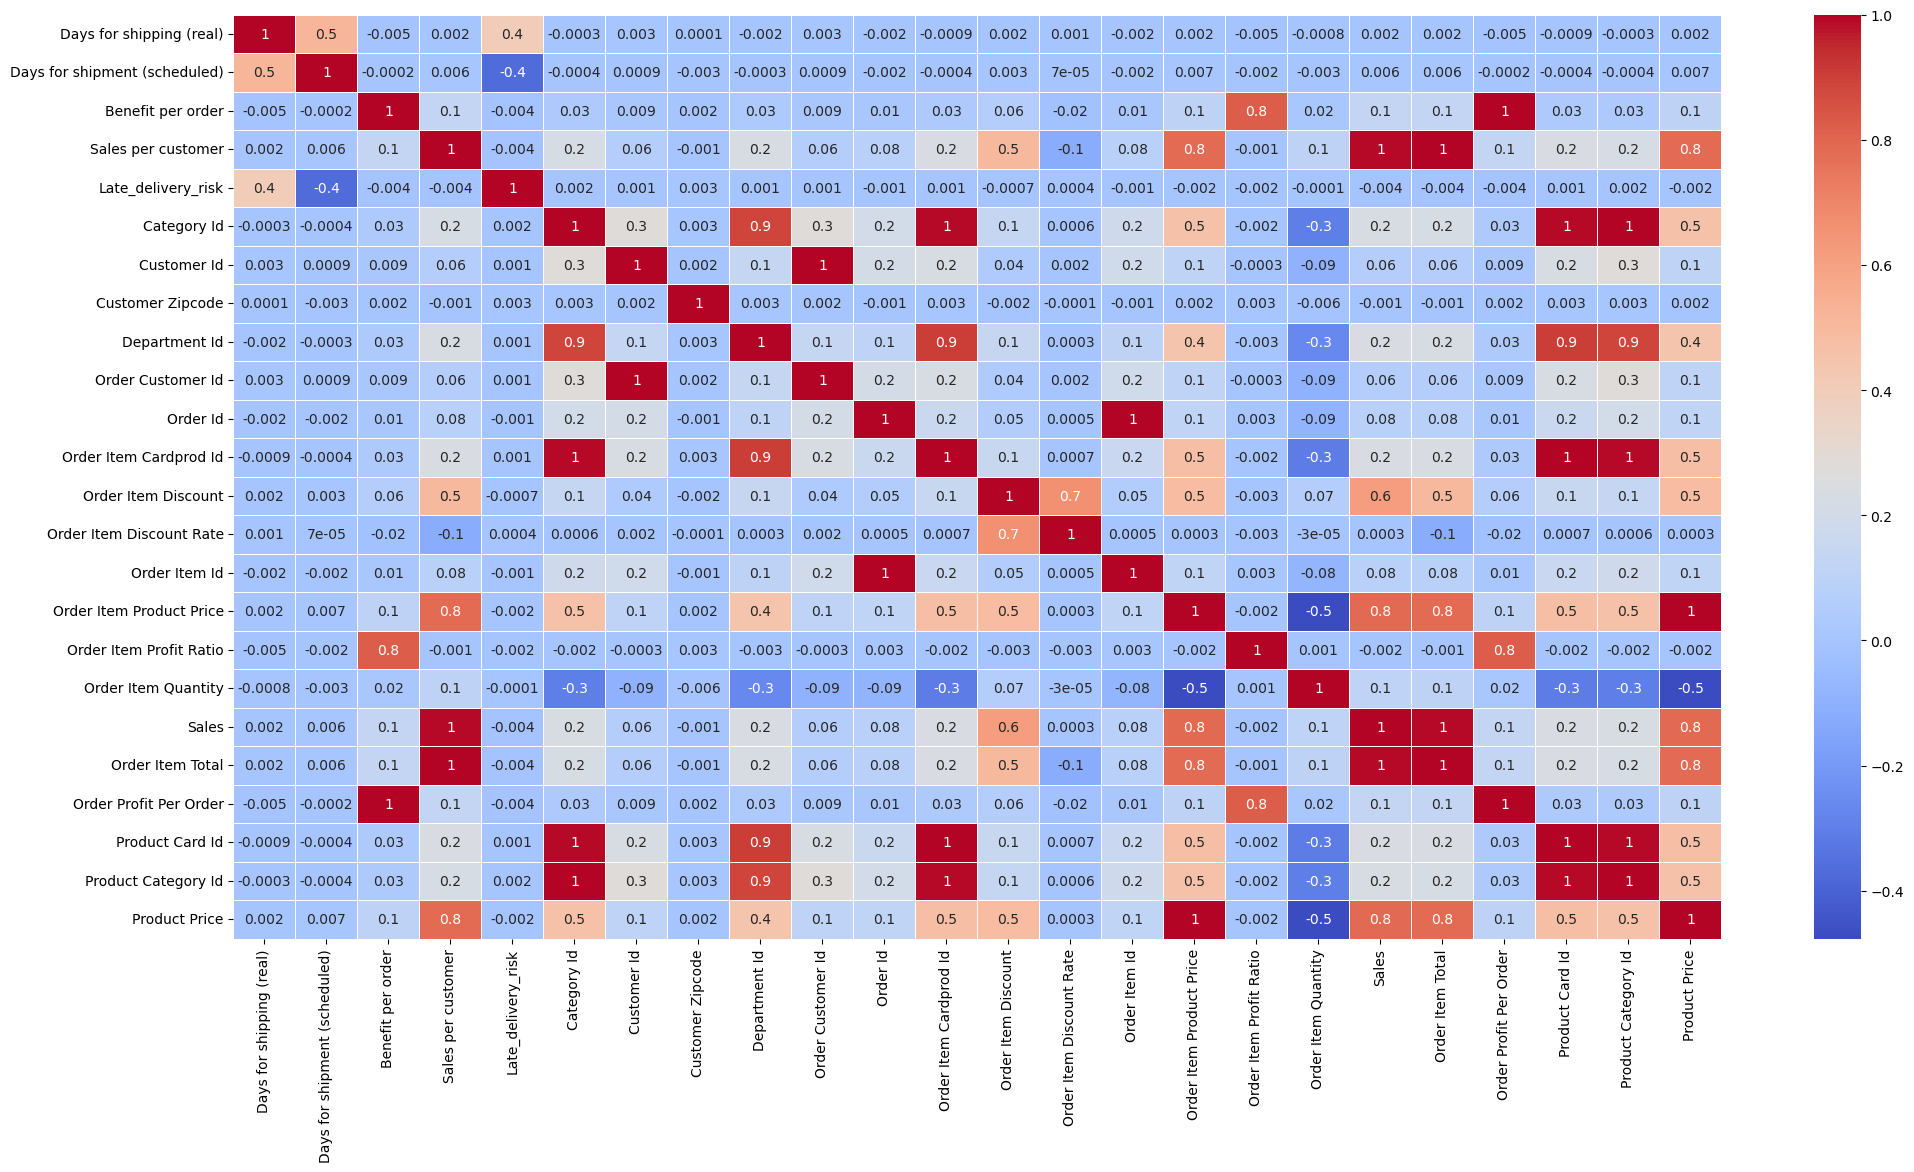

In [36]:
# Need to prepare a DataFrame by selecting only numeric columns or converting the 'Type' column to numeric, replacing errors with NaN. 
# Option 1: Drop non-numeric columns
data_numeric = data.select_dtypes(include=['number'])

# Option 2: Convert relevant columns to numeric, coercing errors to NaN
data['Type'] = pd.to_numeric(data['Type'], errors='coerce')

# Now you can calculate the correlation matrix
fig, ax = plt.subplots(figsize=(24, 12))  # figsize
sns.heatmap(data_numeric.corr(), annot=True, linewidths=.5, fmt='.1g', cmap='coolwarm')  # Heatmap for correlation matrix

### We can observe that product price price has high correlation with Sales, Order Item Total.

To analyze supply chain data, it's important to identify the region with the highest sales. This can be achieved using the `groupby` method to group similar market regions and the `sum` function to total their sales.

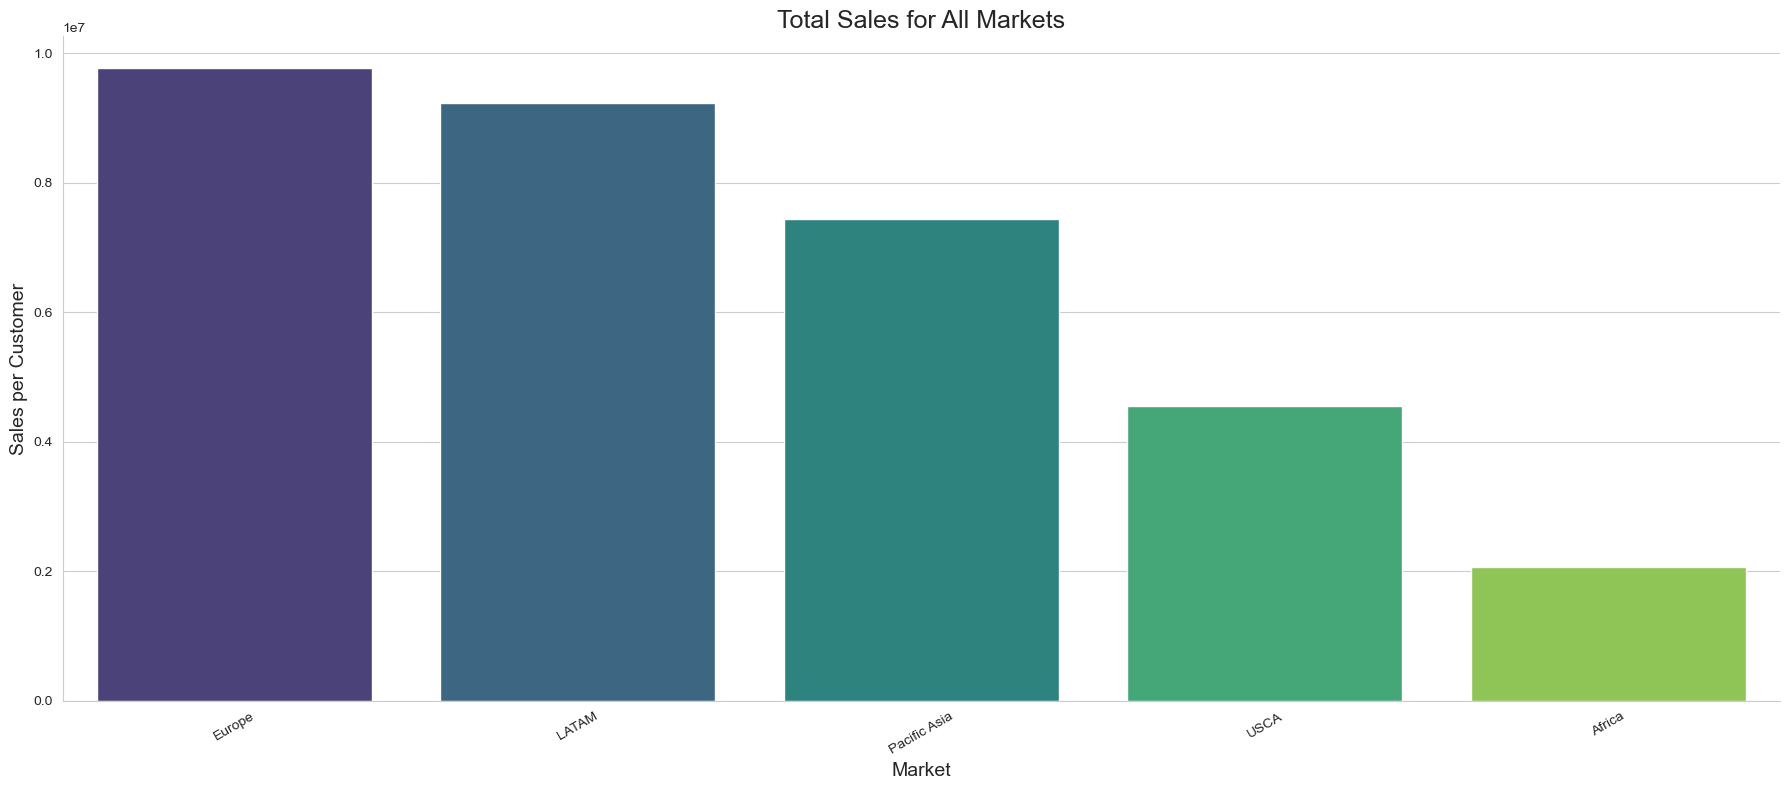

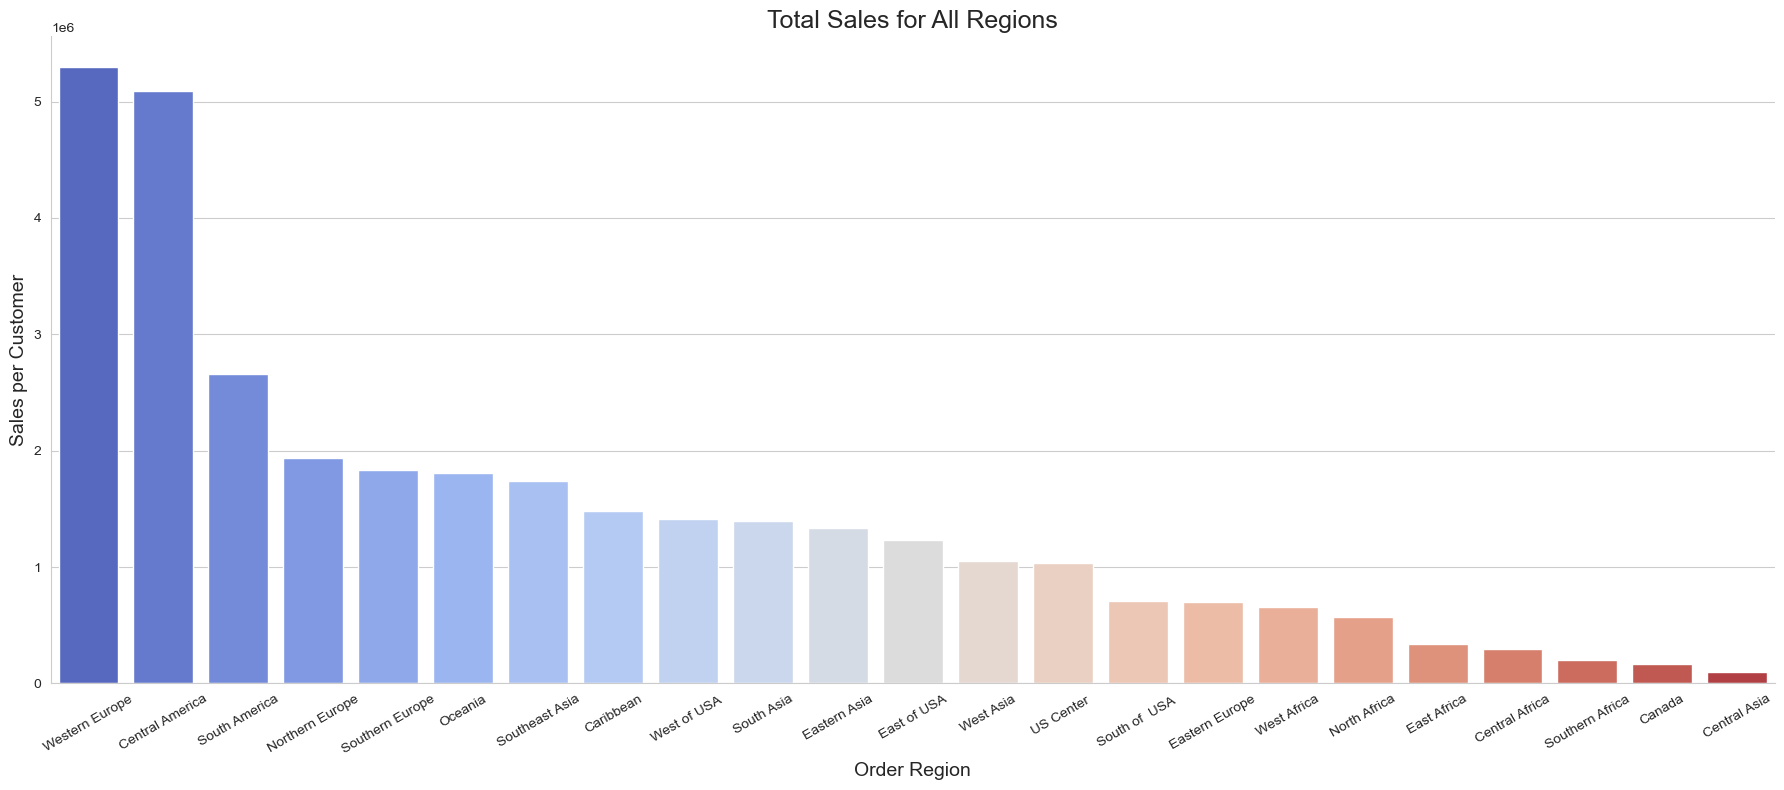

In [39]:
# Grouping data with observed parameter set to False
market = data.groupby('Market', observed=False)
region = data.groupby('Order Region', observed=False)

# Prepare data for plotting
market_sales = market['Sales per customer'].sum().sort_values(ascending=False)
region_sales = region['Sales per customer'].sum().sort_values(ascending=False)

# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Plot total sales for all markets
plt.figure(figsize=(18, 8))  # Increased width for better spacing
if not market_sales.empty:
    sns.barplot(x=market_sales.index, y=market_sales.values, hue=market_sales.index, palette='viridis', legend=False)
    plt.title("Total Sales for All Markets", fontsize=18)
    plt.ylabel('Sales per Customer', fontsize=14)
    plt.xlabel('Market', fontsize=14)
    plt.xticks(rotation=30)  # Adjust rotation for readability
    sns.despine()
else:
    plt.text(0.5, 0.5, 'No data available', fontsize=12, ha='center')
plt.tight_layout()
plt.show()

# Plot total sales for all regions
plt.figure(figsize=(18, 8))  # Increased width for better spacing
if not region_sales.empty:
    sns.barplot(x=region_sales.index, y=region_sales.values, hue=region_sales.index, palette='coolwarm', legend=False)
    plt.title("Total Sales for All Regions", fontsize=18)
    plt.ylabel('Sales per Customer', fontsize=14)
    plt.xlabel('Order Region', fontsize=14)
    plt.xticks(rotation=30)  # Adjust rotation for readability
    sns.despine()
else:
    plt.text(0.5, 0.5, 'No data available', fontsize=12, ha='center')
plt.tight_layout()
plt.show()

### The graph shows that the European market has the highest sales, while Africa has the lowest. Within these markets, Western Europe and Central America reported the highest sales. 

To determine which product category has the highest sales, the same method can be applied.

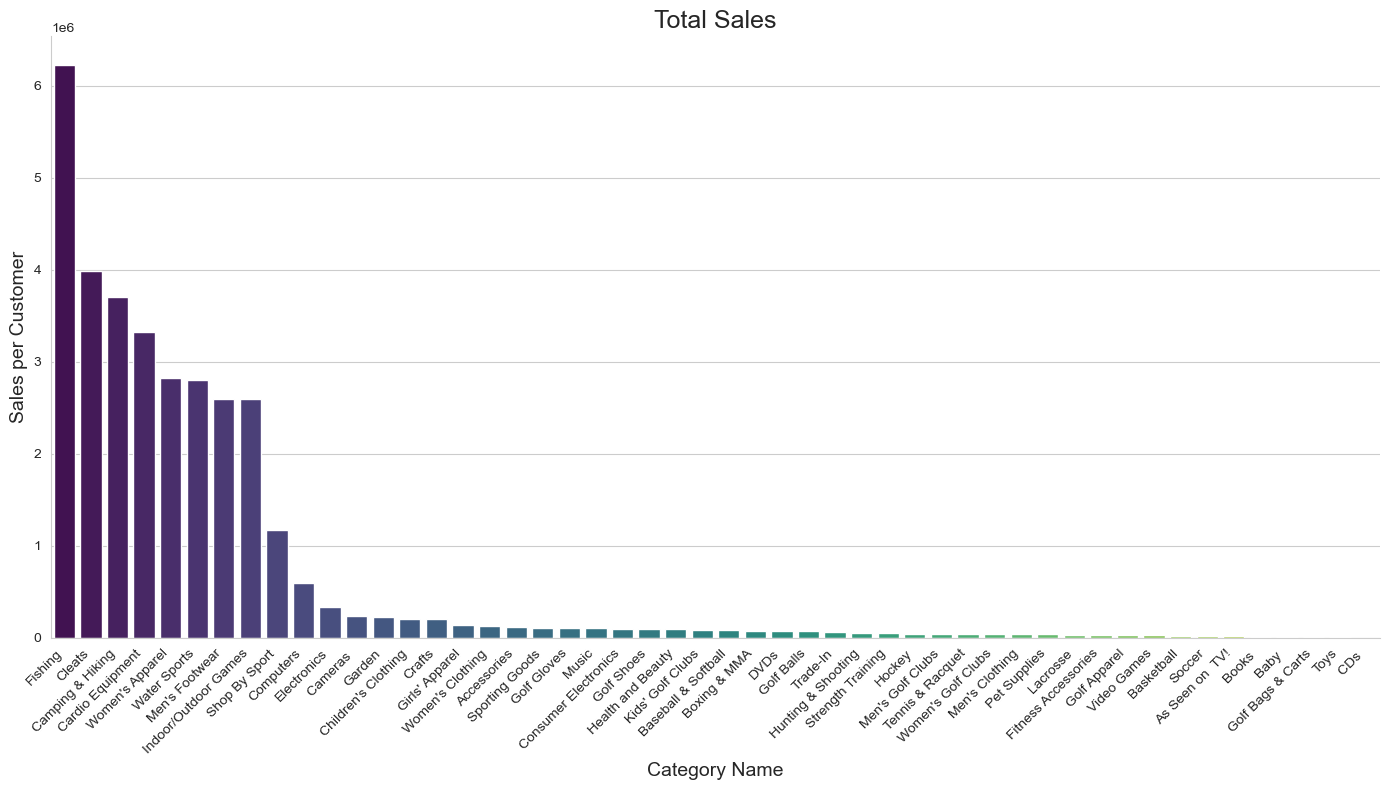

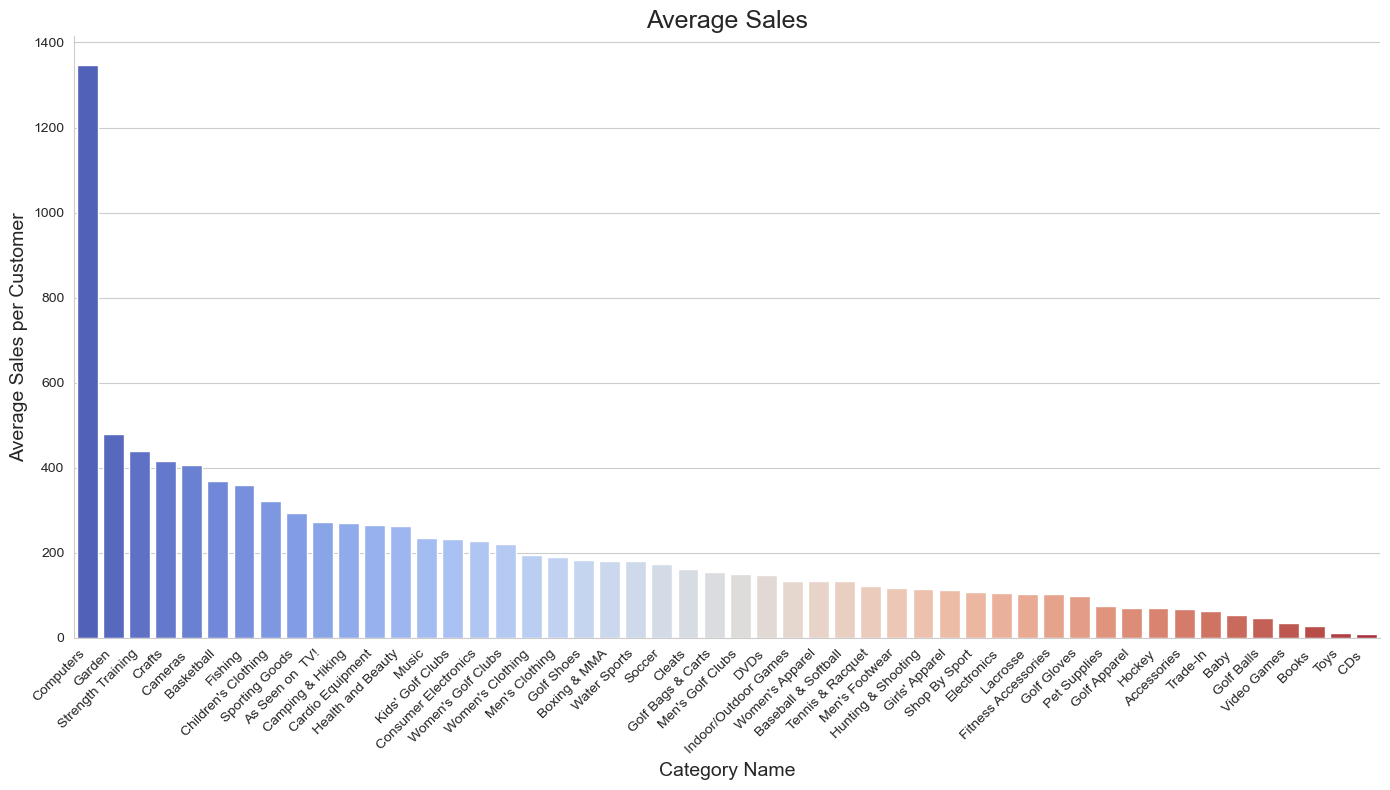

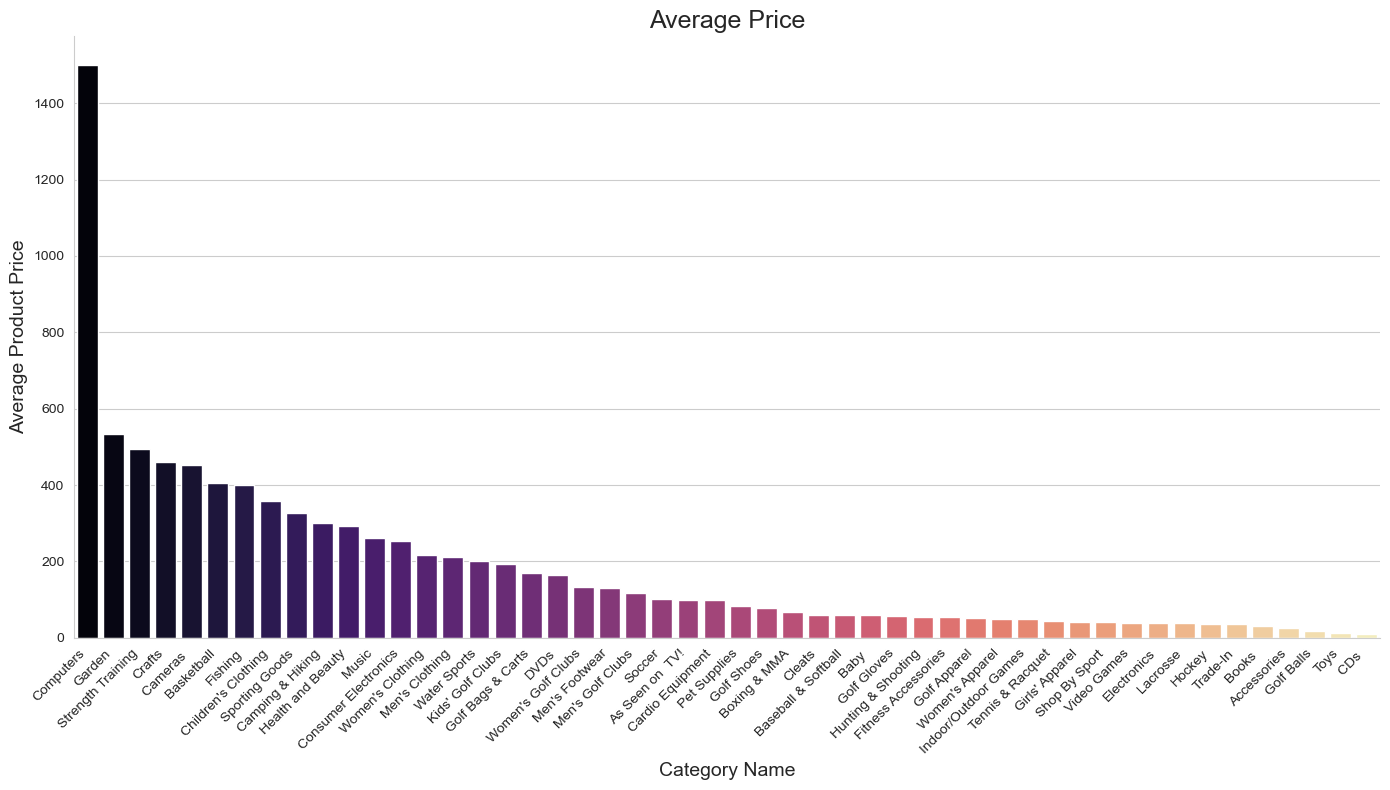

In [42]:
# Grouping all categories
cat = data.groupby('Category Name')

# Prepare data for plotting
total_sales = cat['Sales per customer'].sum().sort_values(ascending=False)
average_sales = cat['Sales per customer'].mean().sort_values(ascending=False)
average_prices = cat['Product Price'].mean().sort_values(ascending=False)

sns.set_style("whitegrid")

# Plot 1: Total Sales
plt.figure(figsize=(14, 8))
sns.barplot(x=total_sales.index, y=total_sales.values, hue=total_sales.index, palette='viridis', legend=False)
plt.title("Total Sales", fontsize=18)
plt.xlabel("Category Name", fontsize=14)
plt.ylabel("Sales per Customer", fontsize=14)
plt.xticks(rotation=45, ha='right')
sns.despine()
plt.tight_layout()
plt.show()

# Plot 2: Average Sales
plt.figure(figsize=(14, 8))
sns.barplot(x=average_sales.index, y=average_sales.values, hue=average_sales.index, palette='coolwarm', legend=False)
plt.title("Average Sales", fontsize=18)
plt.xlabel("Category Name", fontsize=14)
plt.ylabel("Average Sales per Customer", fontsize=14)
plt.xticks(rotation=45, ha='right')
sns.despine()
plt.tight_layout()
plt.show()

# Plot 3: Average Price
plt.figure(figsize=(14, 8))
sns.barplot(x=average_prices.index, y=average_prices.values, hue=average_prices.index, palette='magma', legend=False)
plt.title("Average Price", fontsize=18)
plt.xlabel("Category Name", fontsize=14)
plt.ylabel("Average Product Price", fontsize=14)
plt.xticks(rotation=45, ha='right')
sns.despine()
plt.tight_layout()
plt.show()

### Figure 1 shows that the fishing category had the highest sales, followed by cleats. Interestingly, the top seven products with the highest average prices are also the best-sellers, with computers achieving nearly 1,350 sales despite a $1,500 price tag. Given the strong correlation between price and sales, it will be insightful to analyze how price impacts sales trends across all products.

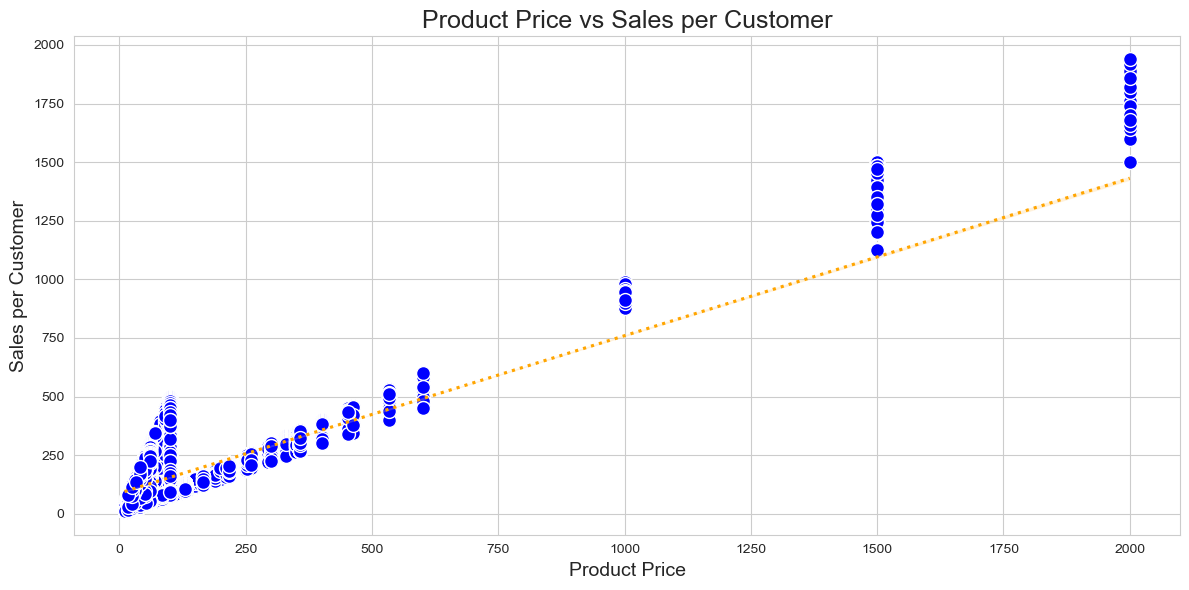

In [44]:
# Set the aesthetic style
sns.set_style("whitegrid")
plt.figure(figsize=(12, 6))  # Set figure size
sns.scatterplot(data=data, x='Product Price', y='Sales per customer',
                color='blue', marker='o', s=100, edgecolor='w', linewidth=1)

# Add a regression line to visualize the trend
sns.regplot(data=data, x='Product Price', y='Sales per customer', 
            scatter=False, color='orange', line_kws={'linestyle': 'dotted'})

plt.title('Product Price vs Sales per Customer', fontsize=18)
plt.xlabel('Product Price', fontsize=14)
plt.ylabel('Sales per Customer', fontsize=14)

plt.tight_layout()
plt.show()

### Prices show a linear relationship with sales. To identify which quarter had the highest sales, we can analyze order timestamps by breaking them down into years, months, weekdays, and hours to better observe the trends.

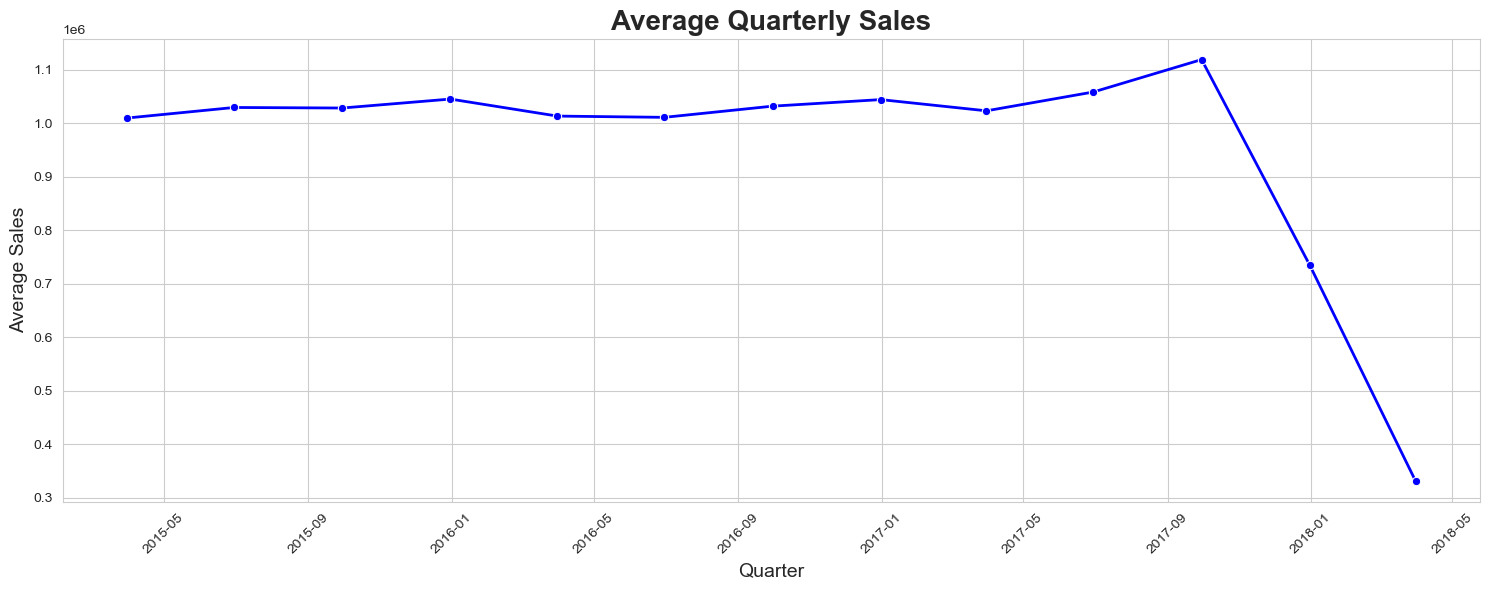

In [47]:
data['order_year'] = pd.DatetimeIndex(data['order date (DateOrders)']).year
data['order_month'] = pd.DatetimeIndex(data['order date (DateOrders)']).month
data['order_week_day'] = pd.DatetimeIndex(data['order date (DateOrders)']).day_name()
data['order_hour'] = pd.DatetimeIndex(data['order date (DateOrders)']).hour
data['order_month_year'] = pd.to_datetime(data['order date (DateOrders)']).dt.to_period('M')

quarter_sales = data.groupby('order_month_year')['Sales'].sum().to_timestamp().resample('QE').mean()

sns.set_style("whitegrid")

plt.figure(figsize=(15, 6))
sns.lineplot(x=quarter_sales.index, y=quarter_sales.values, marker='o', color='blue', linewidth=2)

plt.title('Average Quarterly Sales', fontsize=20, fontweight='bold')
plt.xlabel('Quarter', fontsize=14)
plt.ylabel('Average Sales', fontsize=14)
plt.grid(True)
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

### The graph shows consistent sales from Q1 2015 to Q3 2017, followed by a sudden decline in Q1 2018. What are the purchasing trends across weekdays, hours, and months?

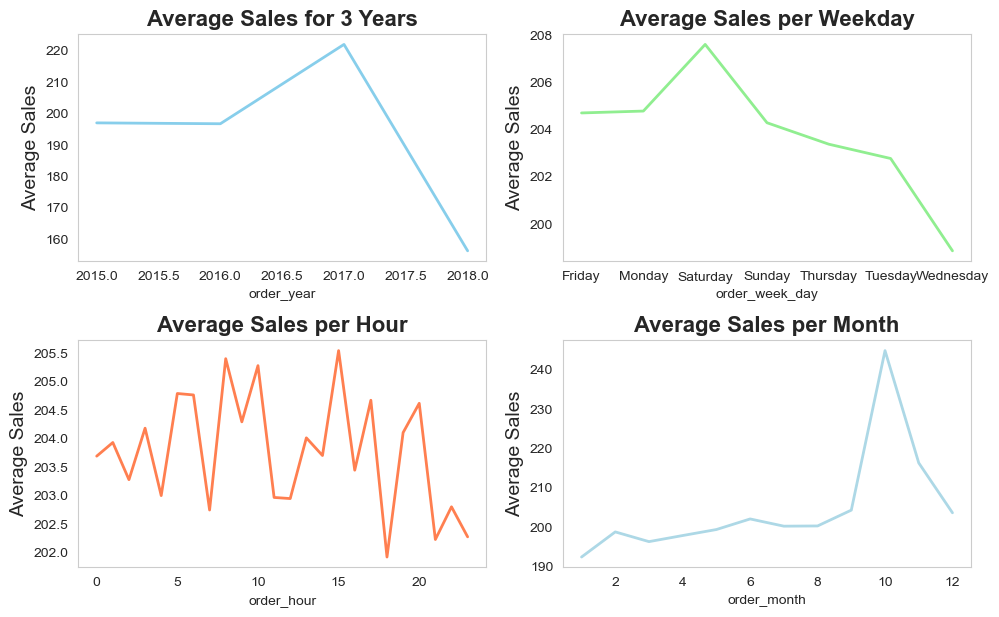

In [49]:
sns.set_style("whitegrid")

plt.figure(figsize=(10, 12))

# Average Sales per Year
plt.subplot(4, 2, 1)
quater = data.groupby('order_year')
quater['Sales'].mean().plot(kind='line', color='skyblue', linewidth=2)
plt.title('Average Sales for 3 Years', fontsize=16, fontweight='bold', loc='center')
plt.ylabel('Average Sales', fontsize=14)
plt.grid()

# Average Sales per Weekday
plt.subplot(4, 2, 2)
days = data.groupby("order_week_day")
days['Sales'].mean().plot(kind='line', color='lightgreen', linewidth=2)
plt.title('Average Sales per Weekday', fontsize=16, fontweight='bold', loc='center')
plt.ylabel('Average Sales', fontsize=14)
plt.grid()

# Average Sales per Hour
plt.subplot(4, 2, 3)
hrs = data.groupby("order_hour")
hrs['Sales'].mean().plot(kind='line', color='coral', linewidth=2)
plt.title('Average Sales per Hour', fontsize=16, fontweight='bold', loc='center')
plt.ylabel('Average Sales', fontsize=14)
plt.grid()

# Average Sales per Month
plt.subplot(4, 2, 4)
mnth = data.groupby("order_month")
mnth['Sales'].mean().plot(kind='line', color='lightblue', linewidth=2)
plt.title('Average Sales per Month', fontsize=16, fontweight='bold', loc='center')
plt.ylabel('Average Sales', fontsize=14)
plt.grid()

plt.tight_layout()
plt.show()

### The analysis reveals how price affects sales, as well as when and which products see the most sales. October had the highest number of orders, followed by November, with other months showing consistent sales. The peak year for orders was 2017. Saturdays had the highest average sales, while Wednesdays had the lowest. Average sales remained stable throughout the day, with a standard deviation of 3.

It's also essential to understand the preferred payment methods for purchasing products across regions. This can be determined by using the `.unique()` method to identify the different payment options.

In [52]:
data['Type'].unique()

array([nan])

Since for Corrleation we made it Null, we have to clean the data once more

In [54]:
# To make it easier for analysis some unimportant columns are dropped
data=dataset.drop(['Customer Email','Product Status','Customer Password','Customer Street','Customer Fname','Customer Lname',
           'Latitude','Longitude','Product Description','Product Image','Order Zipcode','shipping date (DateOrders)'],axis=1)
data.shape

(180519, 42)

Four payment methods were identified. Which one is most preferred across different regions?

In [56]:
data['Type'].unique()

array(['DEBIT', 'TRANSFER', 'CASH', 'PAYMENT'], dtype=object)

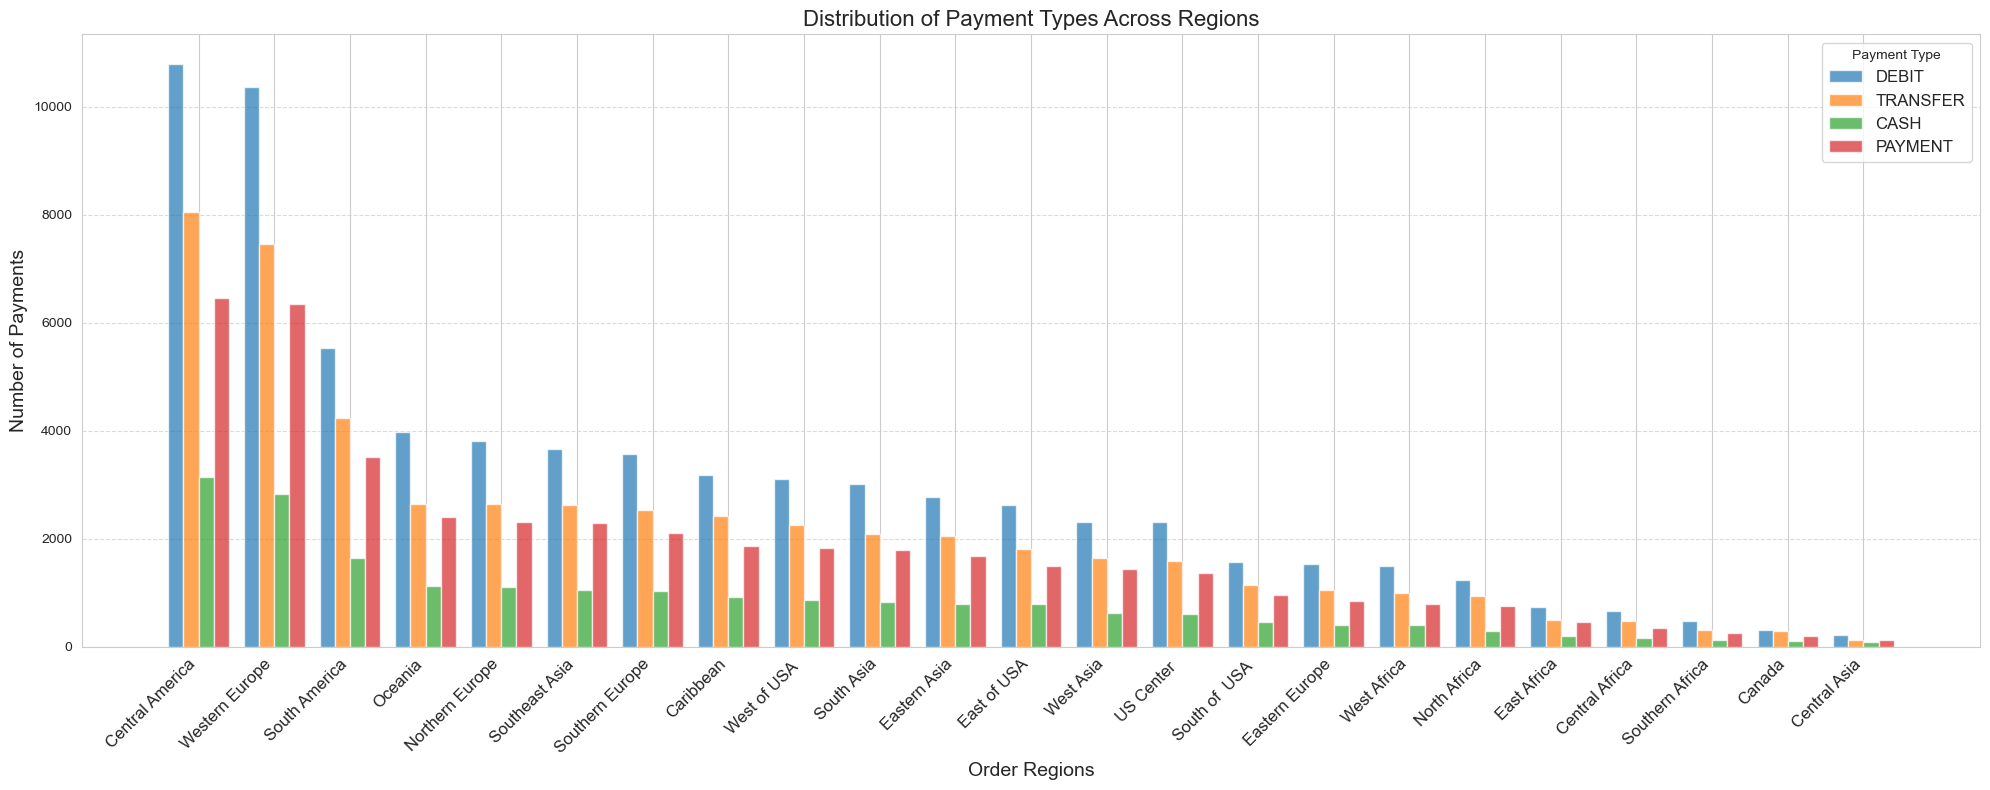

In [57]:
# Grouping data by payment type
payment_types = data['Type'].unique()
counts = {ptype: data[data['Type'] == ptype]['Order Region'].value_counts() for ptype in payment_types}

# Prepare for plotting
names = data['Order Region'].value_counts().index
n_groups = len(names)
bar_width = 0.2
opacity = 0.7

fig, ax = plt.subplots(figsize=(20, 8))

for i, ptype in enumerate(payment_types):
    ax.bar(np.arange(n_groups) + i * bar_width, counts[ptype], bar_width, alpha=opacity, label=ptype)

# Enhancements
ax.set_xlabel('Order Regions', fontsize=14)
ax.set_ylabel('Number of Payments', fontsize=14)
ax.set_title('Distribution of Payment Types Across Regions', fontsize=16)
ax.legend(title='Payment Type', fontsize=12)
ax.set_xticks(np.arange(n_groups) + bar_width * (len(payment_types) - 1) / 2)
ax.set_xticklabels(names, rotation=45, ha='right', fontsize=12)
ax.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

### Debit is the most preferred payment method across all regions, while cash is the least preferred. 

Some products show a negative benefit per order, indicating revenue loss for the company. Which products are experiencing this?

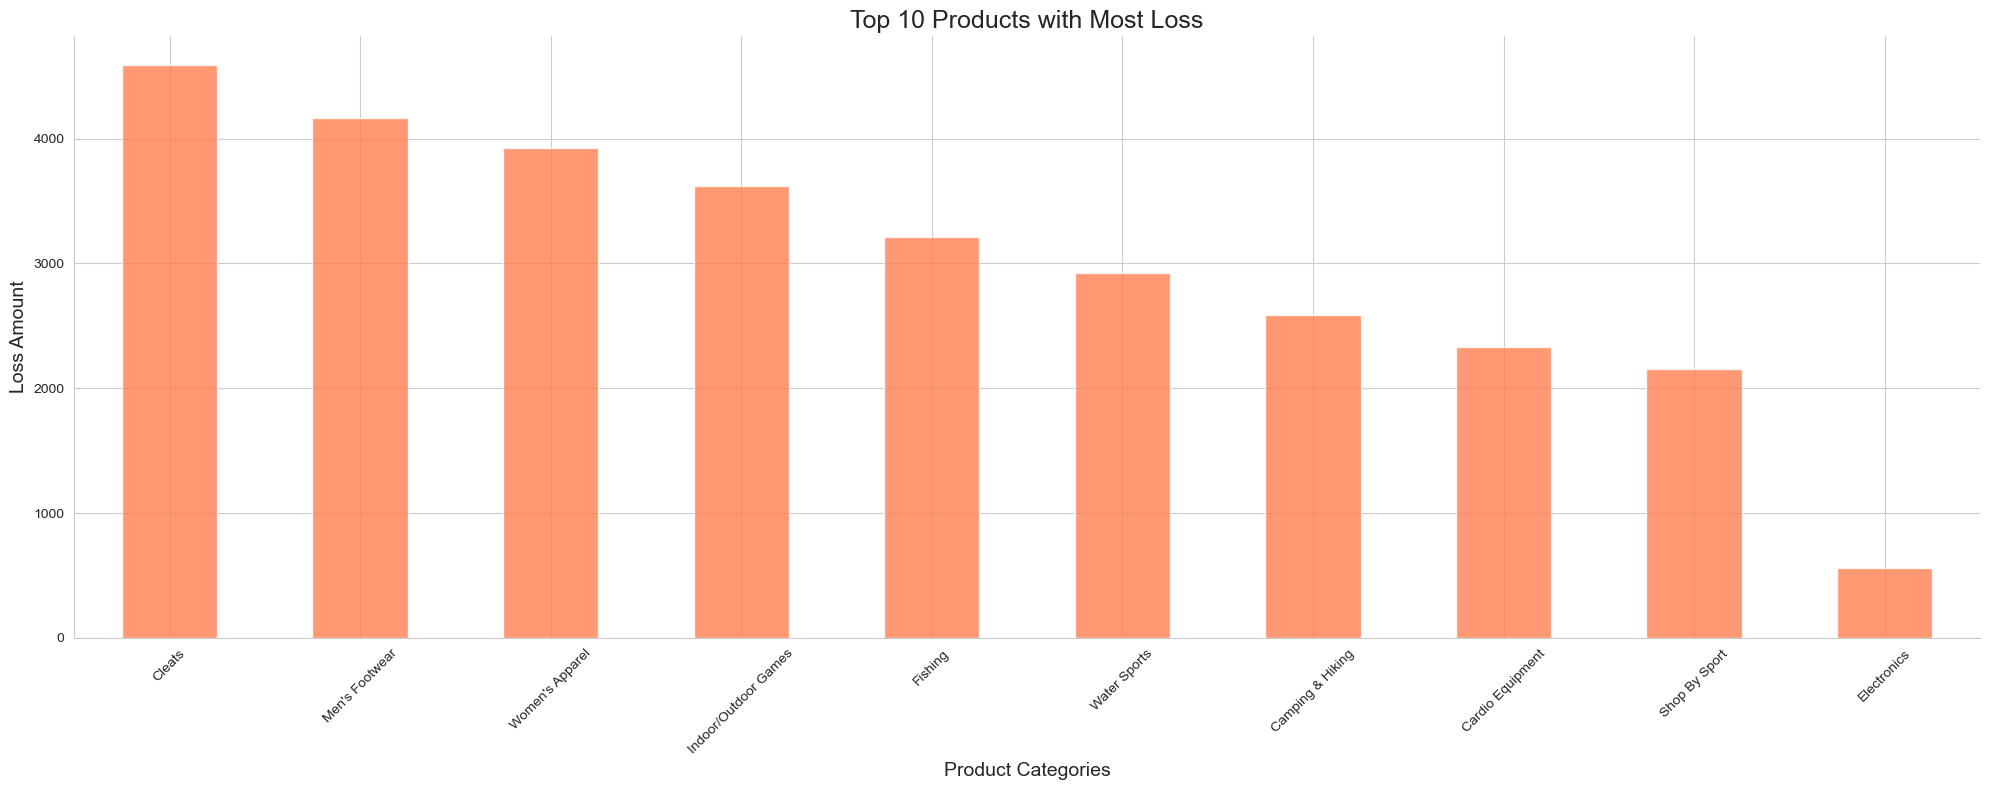

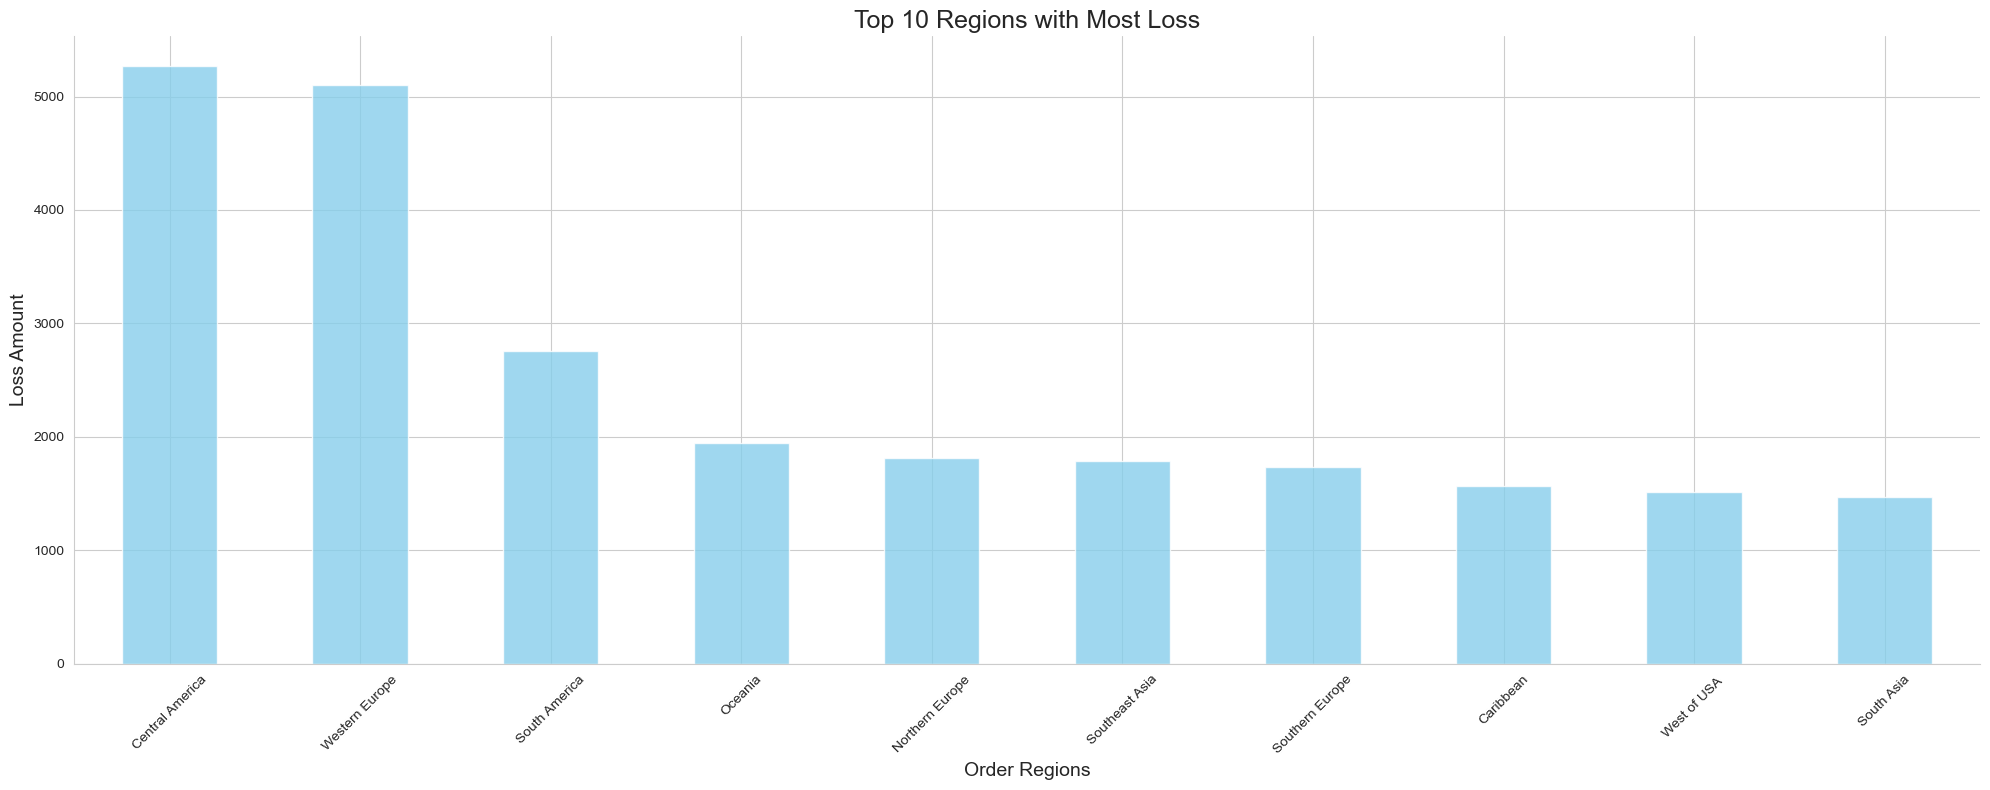

Total revenue lost with orders: -3883547.345768667


In [59]:
loss = data[data['Benefit per order'] < 0]

# Plot for top 10 products with most loss
plt.figure(figsize=(20, 8))
loss['Category Name'].value_counts().nlargest(10).plot.bar(color='coral', alpha=0.8)
plt.title("Top 10 Products with Most Loss", fontsize=18)
plt.xlabel("Product Categories", fontsize=14)
plt.ylabel("Loss Amount", fontsize=14)
plt.xticks(rotation=45)
sns.despine()
plt.tight_layout()
plt.show()

# Plot for top 10 regions with most loss
plt.figure(figsize=(20, 8))
loss['Order Region'].value_counts().nlargest(10).plot.bar(color='skyblue', alpha=0.8)
plt.title("Top 10 Regions with Most Loss", fontsize=18)
plt.xlabel("Order Regions", fontsize=14)
plt.ylabel("Loss Amount", fontsize=14)
plt.xticks(rotation=45)
sns.despine()
plt.tight_layout()
plt.show()

# Sum of total sales lost
total_loss = loss['Benefit per order'].sum()
print('Total revenue lost with orders:', total_loss)

### Total lost sales are around 3.9 million, a significant amount. The Cleats category has the highest losses, followed by Men's Footwear. Most losses occur in Central America and Western Europe, possibly due to suspected fraud or late deliveries. Identifying which payment methods are associated with fraud could help prevent future incidents.


In [61]:
xyz = data[(data['Type'] != 'TRANSFER')&(data['Order Status'] == 'SUSPECTED_FRAUD')]
xyz['Order Region'].value_counts()

Series([], Name: count, dtype: int64)

### It’s evident that no fraud is associated with DEBIT, CASH, or PAYMENT methods; all suspected fraudulent orders likely involve wire transfers from abroad. Which region and product are most frequently linked to these suspected frauds?

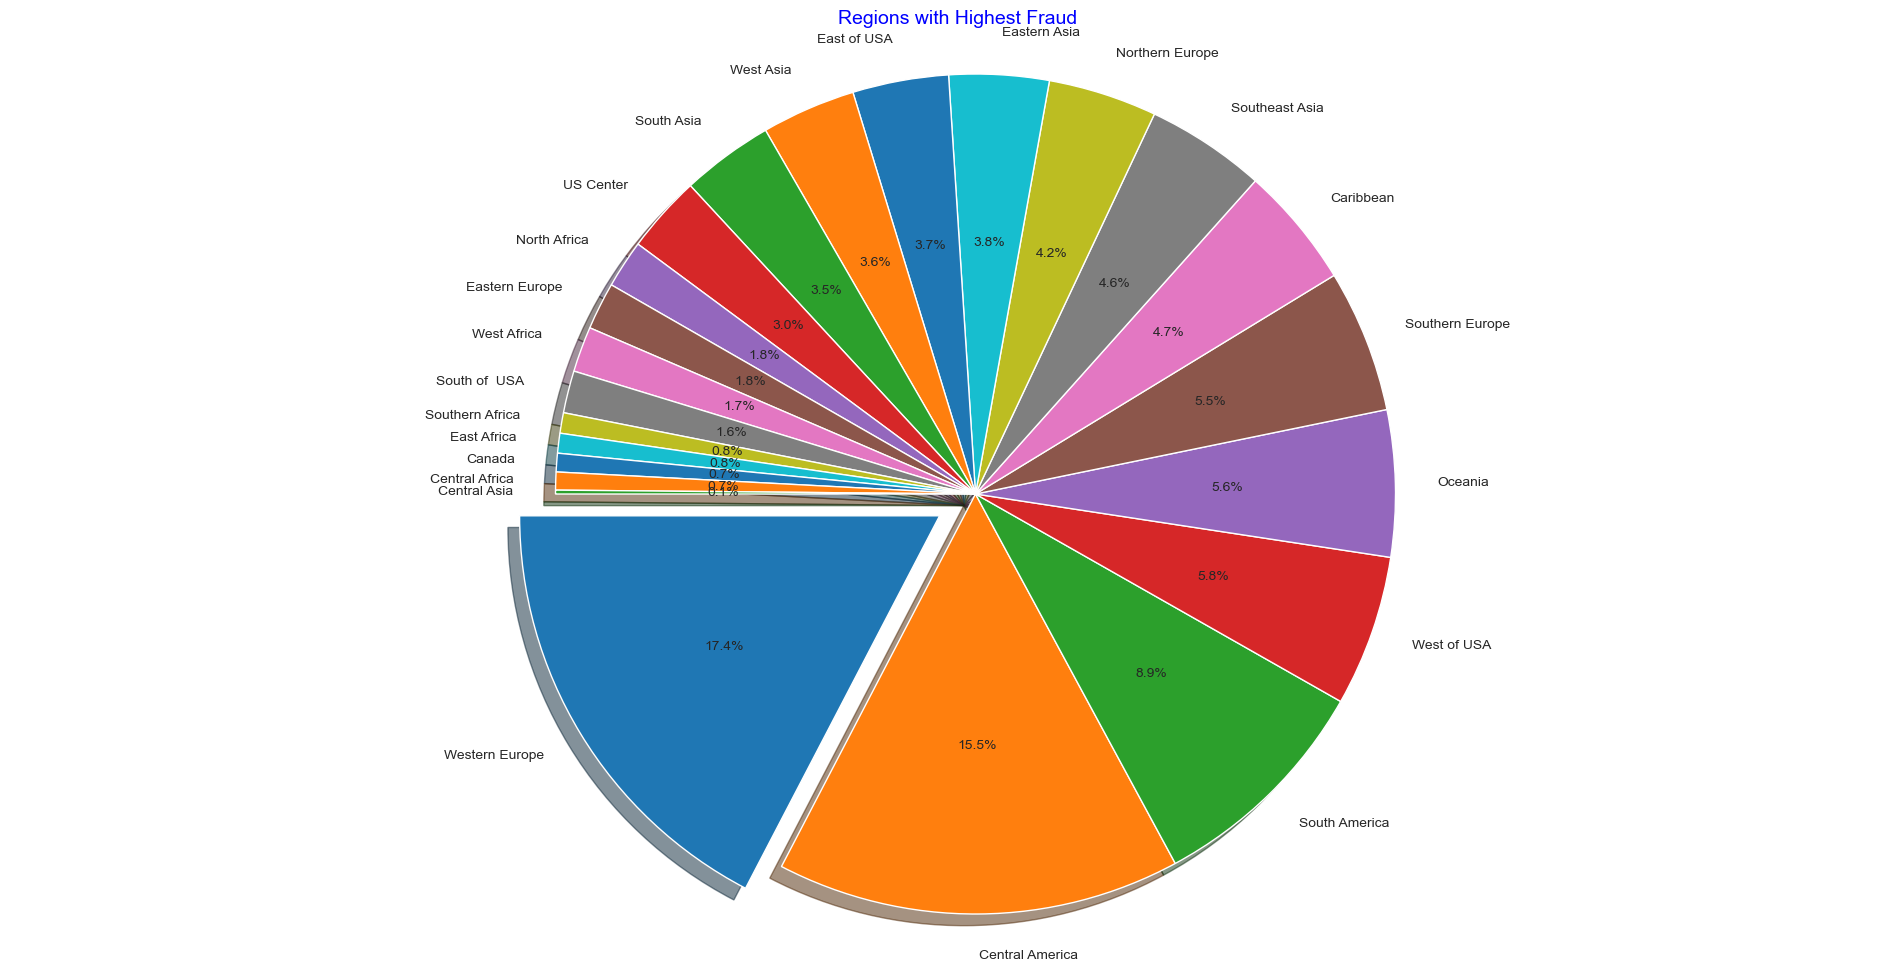

In [63]:
high_fraud = data[(data['Order Status'] == 'SUSPECTED_FRAUD') & (data['Type'] == 'TRANSFER')]  # Separating orders with suspected fraud

# Plotting pie chart with respect to order region
fraud = high_fraud['Order Region'].value_counts().plot.pie(
    figsize=(24, 12),
    startangle=180, 
    explode=(0.1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0),
    autopct='%.1f%%',
    shadow=True
)

plt.title("Regions with Highest Fraud", size=14, color='b')  # Plotting title
plt.ylabel(" ")
fraud.axis('equal') 
plt.show()

### The majority of suspected fraud orders originate from Western Europe, accounting for about 17.4% of total orders, followed by Central America at 15.5%. Which product is most frequently associated with these suspected frauds?

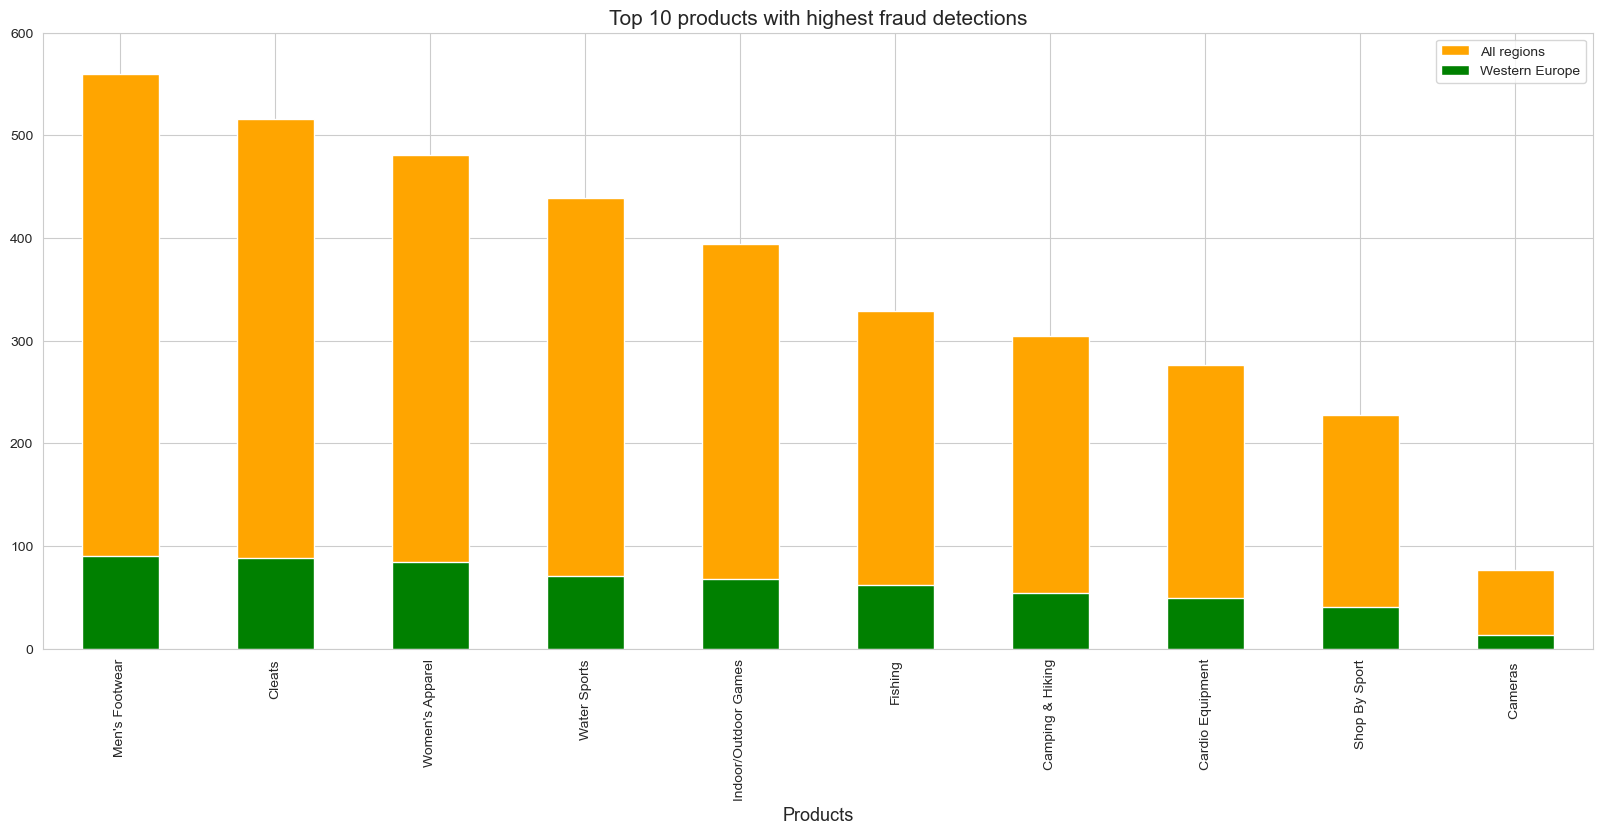

In [65]:
high_fraud1 = data[(data['Order Status'] == 'SUSPECTED_FRAUD')] 
high_fraud2 = data[(data['Order Status'] == 'SUSPECTED_FRAUD') & 
                    (data['Order Region'] == 'Western Europe')]

# Plotting bar chart for top 10 most suspected fraud department in all regions
fraud1 = high_fraud1['Category Name'].value_counts().nlargest(10).plot.bar(
    figsize=(20, 8), title="Fraud Category", color='orange'
)

# Plotting bar chart for top 10 most suspected fraud department in Western Europe
fraud2 = high_fraud2['Category Name'].value_counts().nlargest(10).plot.bar(
    figsize=(20, 8), title="Fraud product in Western Europe", color='green'
)

plt.legend(["All regions", "Western Europe"])
plt.title("Top 10 products with highest fraud detections", size=15)
plt.xlabel("Products", size=13)
plt.ylim(0, 600)
plt.show()

### It's surprising that the cleats department has the highest suspected fraud, followed by men's footwear, in all regions and specifically in Western Europe. Which customers are responsible for these frauds?

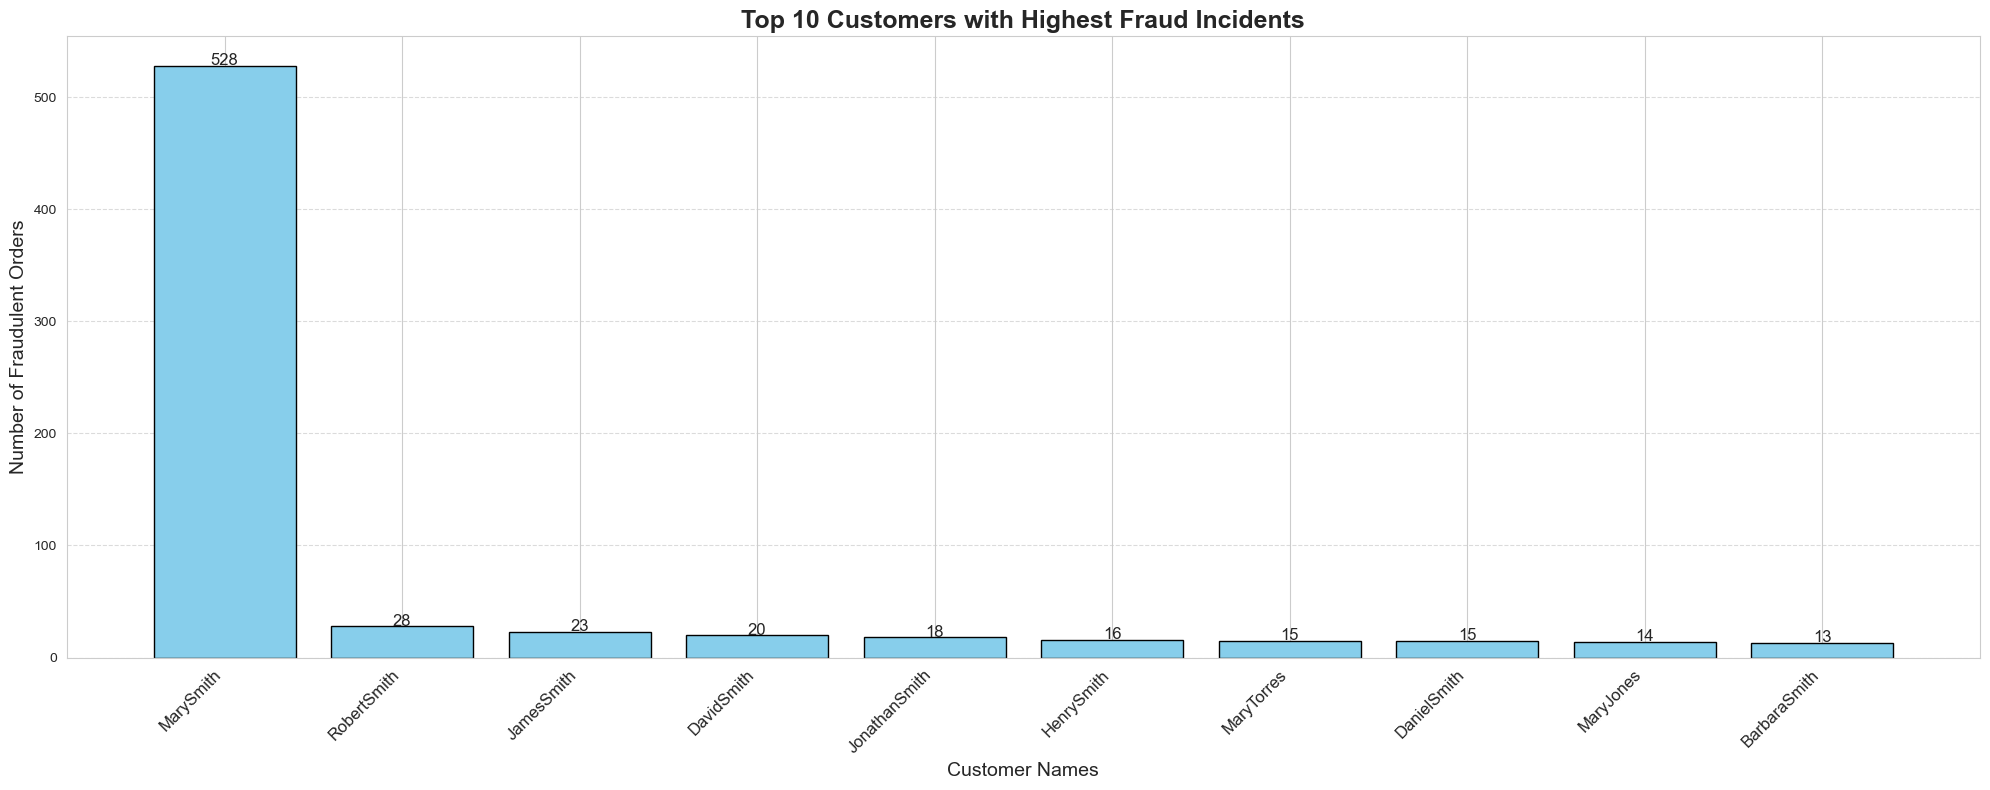

In [67]:
# Filtering out suspected fraud orders
cus = data[data['Order Status'] == 'SUSPECTED_FRAUD']

# Plotting top 10 customers with most fraud
plt.figure(figsize=(20, 8))
top_customers = cus['Customer Full Name'].value_counts().nlargest(10)
bars = plt.bar(top_customers.index, top_customers.values, color='skyblue', edgecolor='black')

# Adding title and labels
plt.title("Top 10 Customers with Highest Fraud Incidents", fontsize=18, fontweight='bold')
plt.xlabel("Customer Names", fontsize=14)
plt.ylabel("Number of Fraudulent Orders", fontsize=14)

# Adding value annotations on top of the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.5, int(yval), ha='center', fontsize=12)

# Improving x-axis clarity
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Adding horizontal grid lines

plt.tight_layout()
plt.show()

### Mary Smith attempted fraud 528 times, which is astonishing. What was the total amount involved in her fraudulent orders?

In [69]:
# Filtering orders of Mary Smith with suspected fraud
amount = data[(data['Customer Full Name'] == 'MarySmith')&(data['Order Status'] == 'SUSPECTED_FRAUD')]
amount['Sales'].sum()

102491.66191043999

### The total fraudulent amount reached nearly $102,000, a substantial figure. Mary used different addresses for each order, resulting in a new customer ID each time, complicating her identification and banning. These factors must be considered to enhance fraud detection algorithms for more accurate identification.

Timely product delivery is crucial for customer satisfaction in a supply chain. Which product categories are experiencing the most late deliveries?

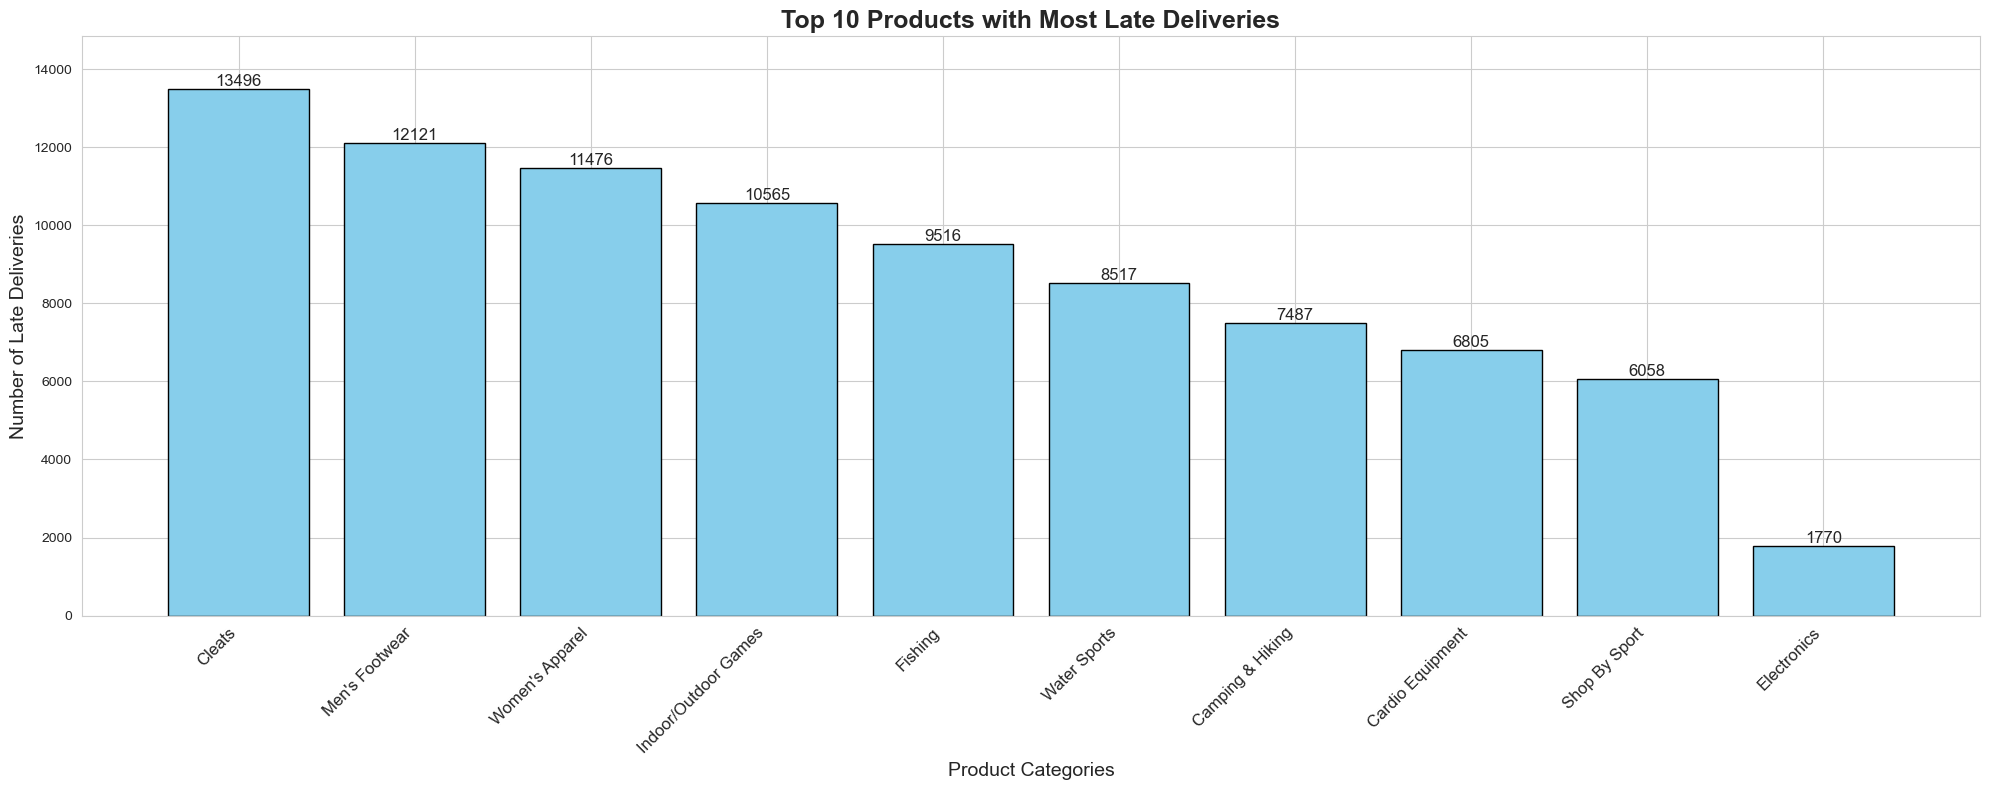

In [71]:
late_delivery = data[data['Delivery Status'] == 'Late delivery']
top_late_products = late_delivery['Category Name'].value_counts().nlargest(10)

plt.figure(figsize=(20, 8))
bars = plt.bar(top_late_products.index, top_late_products.values, color='skyblue', edgecolor='black')

plt.title("Top 10 Products with Most Late Deliveries", fontsize=18, fontweight='bold')
plt.xlabel("Product Categories", fontsize=14)
plt.ylabel("Number of Late Deliveries", fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.ylim(0, top_late_products.values.max() * 1.1)

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), ha='center', va='bottom', fontsize=12)

plt.tight_layout()
plt.show()

### It can be seen that orders with Cleats department is getting delayed the most followed by Men's Footwear.For some orders risk of late delivery is given in data.The products with late delivery risk are compared with late delivered products.

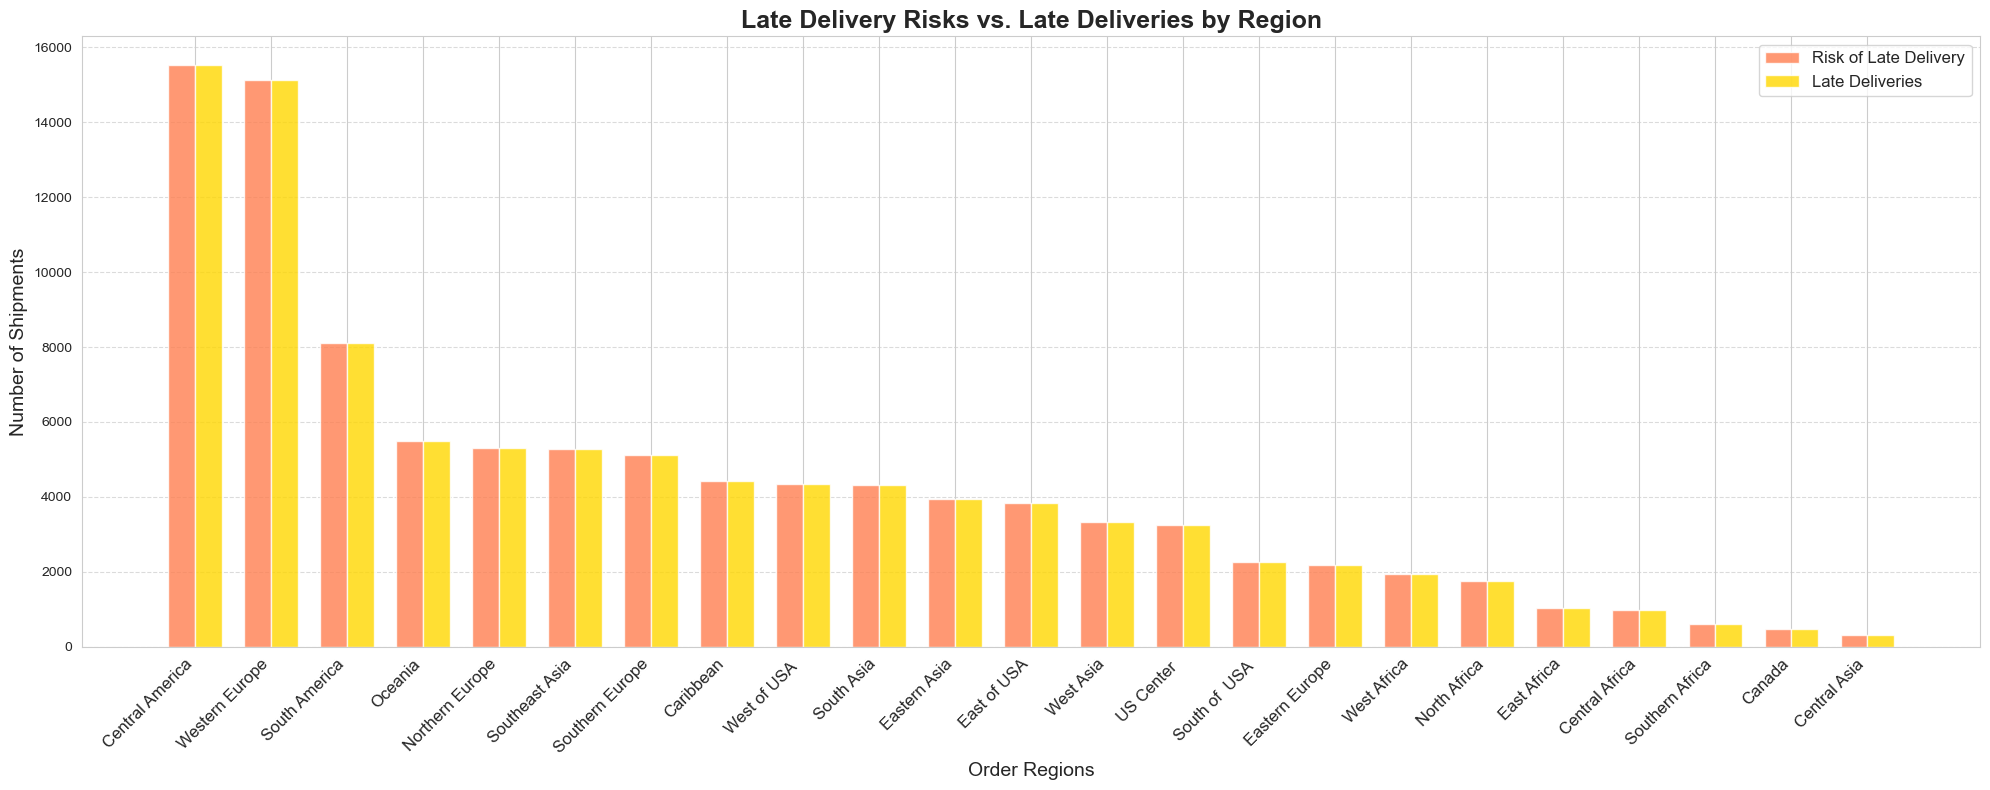

In [73]:
xyz1 = data[data['Late_delivery_risk'] == 1]
xyz2 = data[data['Delivery Status'] == 'Late delivery']
count1 = xyz1['Order Region'].value_counts()
count2 = xyz2['Order Region'].value_counts()
names = data['Order Region'].value_counts().keys()
n_groups = len(names)

fig, ax = plt.subplots(figsize=(20, 8))
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.8

bars1 = plt.bar(index, count1, bar_width, alpha=opacity, color='coral', label='Risk of Late Delivery')
bars2 = plt.bar(index + bar_width, count2, bar_width, alpha=opacity, color='gold', label='Late Deliveries')

plt.xlabel('Order Regions', fontsize=14)
plt.ylabel('Number of Shipments', fontsize=14)
plt.title('Late Delivery Risks vs. Late Deliveries by Region', fontsize=18, fontweight='bold')
plt.legend(fontsize=12)
plt.xticks(index + bar_width / 2, names, rotation=45, ha='right', fontsize=12)

plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### In conclusion, products at risk of late delivery are consistently being delivered late across all regions. To mitigate this, the company could enhance shipping methods or allow more time for deliveries, keeping customers informed of expected arrival dates. It would also be valuable to analyze the number of late deliveries by shipment method across different regions.

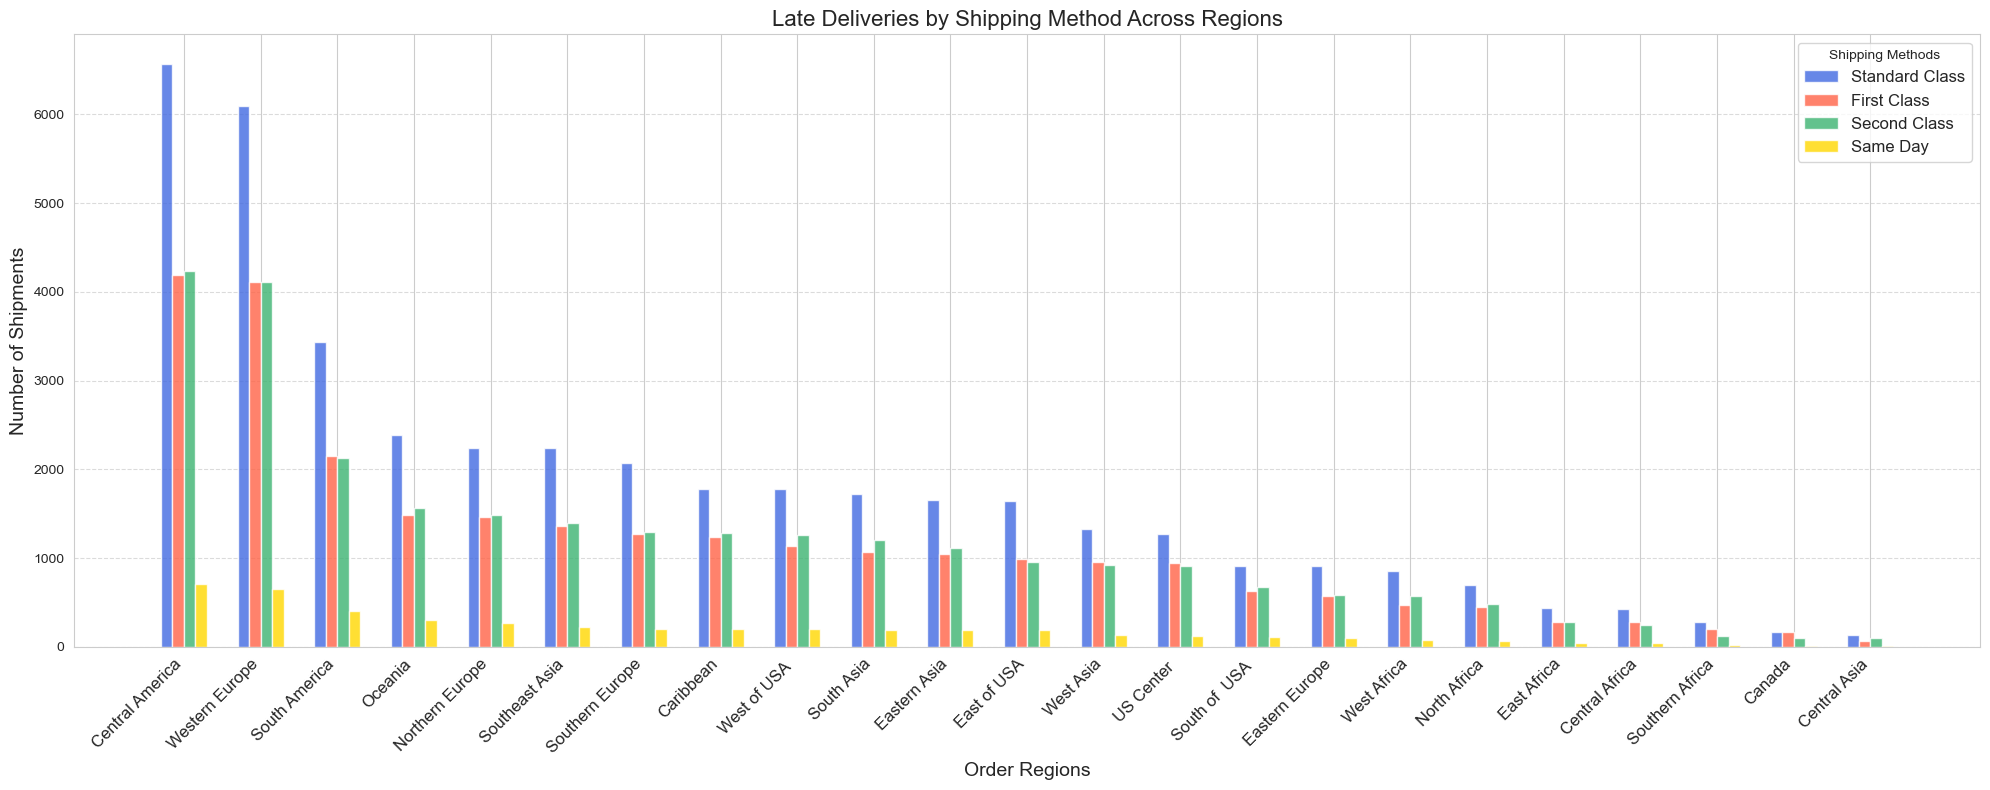

In [75]:
xyz1 = data[(data['Delivery Status'] == 'Late delivery') & (data['Shipping Mode'] == 'Standard Class')]
xyz2 = data[(data['Delivery Status'] == 'Late delivery') & (data['Shipping Mode'] == 'First Class')]
xyz3 = data[(data['Delivery Status'] == 'Late delivery') & (data['Shipping Mode'] == 'Second Class')]
xyz4 = data[(data['Delivery Status'] == 'Late delivery') & (data['Shipping Mode'] == 'Same Day')]

count1 = xyz1['Order Region'].value_counts()
count2 = xyz2['Order Region'].value_counts()
count3 = xyz3['Order Region'].value_counts()
count4 = xyz4['Order Region'].value_counts()

names = data['Order Region'].value_counts().keys()
n_groups = len(names)

fig, ax = plt.subplots(figsize=(20, 8))
index = np.arange(n_groups)
bar_width = 0.15
opacity = 0.8

plt.bar(index, count1, bar_width, alpha=opacity, color='royalblue', label='Standard Class')
plt.bar(index + bar_width, count2, bar_width, alpha=opacity, color='tomato', label='First Class')
plt.bar(index + 2 * bar_width, count3, bar_width, alpha=opacity, color='mediumseagreen', label='Second Class')
plt.bar(index + 3 * bar_width, count4, bar_width, alpha=opacity, color='gold', label='Same Day')

plt.xlabel('Order Regions', fontsize=14)
plt.ylabel('Number of Shipments', fontsize=14)
plt.title('Late Deliveries by Shipping Method Across Regions', fontsize=16)
plt.legend(title='Shipping Methods', fontsize=12)
plt.xticks(index + 1.5 * bar_width, names, rotation=45, ha='right', fontsize=12)
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### As expected the most number of late deliveries for all regions occured with standard class shipping,with same day shipping being the one with least number of late deliveries.Both the first class and second class shipping have almost equal number of late deliveries.

# Customer Segmentation Analysis

### Targeting specific customer segments can help a supply chain company increase its customer base and profits. With purchase history available, RFM analysis can be used for segmentation. It’s favored for its numerical representation of customer recency, frequency, and monetary value, resulting in easily interpretable outcomes.

In [449]:
#Calculating total price for which each order
data['TotalPrice'] = data['Order Item Quantity'] * data['Order Item Total']# Multiplying item price * Order quantity

In [463]:
data['order date (DateOrders)'].max() # Calculating when the last order come to check recency
#Also app gives teh correct value of 2018

'9/9/2017 9:50'

### The last order in the dataset was made on 2017-09-09. So the present time is set slightly above than the last order time for more accuracy of recency value.

In [82]:
present = dt.datetime(2018,2,1)
data['order date (DateOrders)'] = pd.to_datetime(data['order date (DateOrders)'])

In [83]:
Customer_seg = data.groupby('Order Customer Id').agg({
    'order date (DateOrders)': lambda x: (present - x.max()).days,
    'Order Id': lambda x: len(x),
    'TotalPrice': lambda x: x.sum()
})

#Changing order dates to int format
Customer_seg['order date (DateOrders)'] = Customer_seg['order date (DateOrders)'].astype(int)

# Renaming columns as R_Value,F_Value,M_Value
Customer_seg.rename(columns={
    'order date (DateOrders)': 'R_Value', 
    'Order Id': 'F_Value', 
    'TotalPrice': 'M_Value'
}, inplace=True)

Customer_seg.head()

,R_Value,F_Value,M_Value
Order Customer Id,,,
1,792,1,2362.250061
2,136,10,2842.700073
3,229,18,6143.760057
4,380,14,4370.629991
5,457,7,2993.790032


* R_Value(Recency) indicates how much time elapsed since a customer last order.
* F_Value(Frequency) indicates how many times a customer ordered.
* M_Value(Monetary value) tells us how much a customer has spent purchasing items.

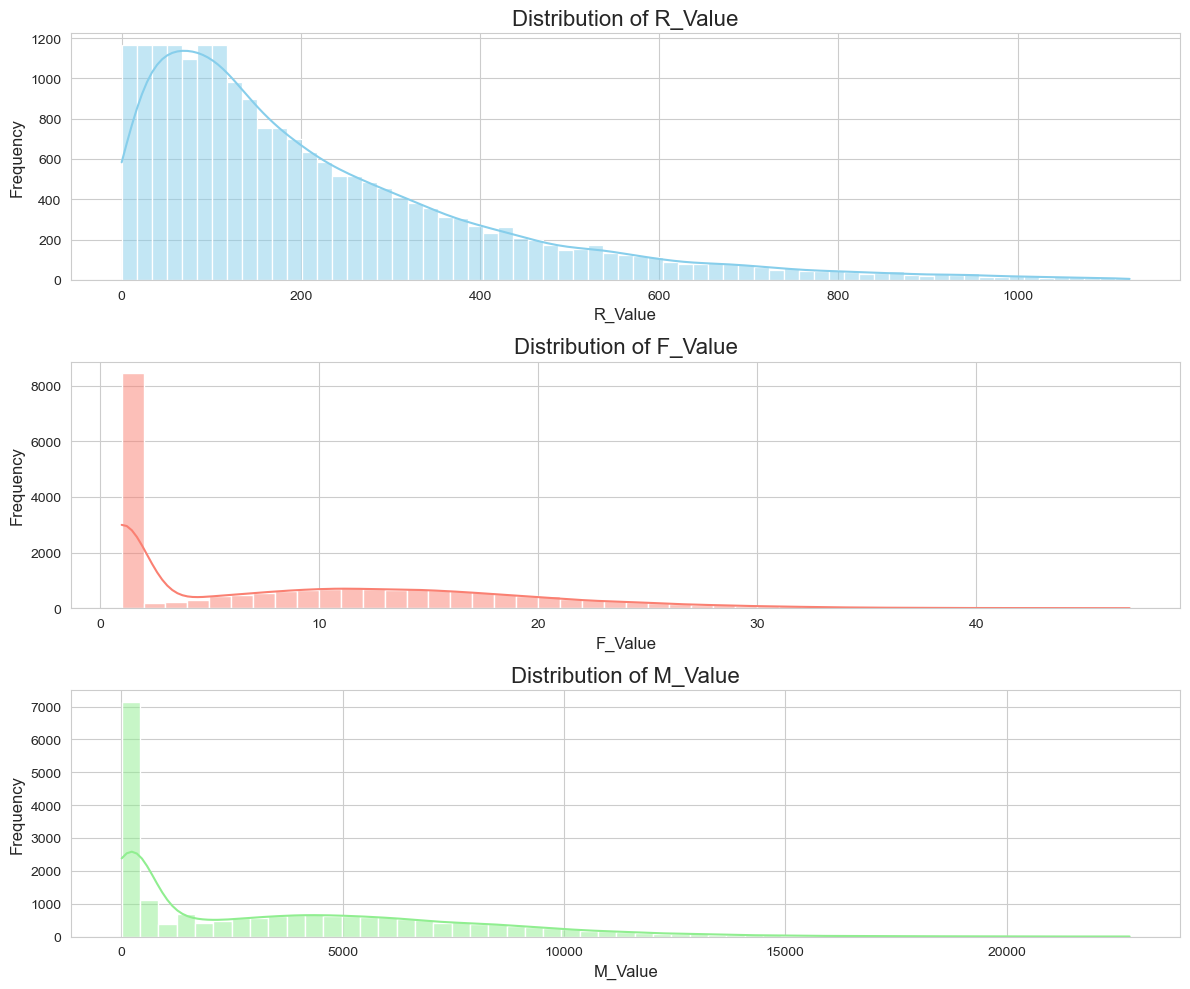

In [104]:
plt.figure(figsize=(12, 10))

plt.subplot(3, 1, 1)
sns.histplot(Customer_seg['R_Value'], kde=True, color='skyblue')
plt.title('Distribution of R_Value', fontsize=16)
plt.xlabel('R_Value', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

plt.subplot(3, 1, 2)
sns.histplot(Customer_seg['F_Value'], kde=True, color='salmon')
plt.title('Distribution of F_Value', fontsize=16)
plt.xlabel('F_Value', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

plt.subplot(3, 1, 3)
sns.histplot(Customer_seg['M_Value'], kde=True, color='lightgreen')
plt.title('Distribution of M_Value', fontsize=16)
plt.xlabel('M_Value', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

plt.tight_layout()
plt.show()

In [106]:
quantiles = Customer_seg.quantile(q=[0.25,0.5,0.75]) #Dividing RFM data into four quartiles
quantiles = quantiles.to_dict()

### The data is divided into four quantiles. A low R_Value reflects recent customer activity, while high F_Value and M_Value indicate frequency and total purchase value. A function is defined to represent quantiles as numerical values.

In [109]:
# R_Score should be minimum so 1st quantile is set as 1.
def R_Score(a,b,c):
    if a <= c[b][0.25]:
        return 1
    elif a <= c[b][0.50]:
        return 2
    elif a <= c[b][0.75]: 
        return 3
    else:
        return 4
# The higher the F_Score,M_Score the better so 1st quantile is set as 4.    
def FM_Score(x,y,z):
    if x <= z[y][0.25]:
        return 4
    elif x <= z[y][0.50]:
        return 3
    elif x <= z[y][0.75]: 
        return 2
    else:
        return 1

In [111]:
# New column for R_Score to indicate numerical score between 1 to 4.
Customer_seg['R_Score'] = Customer_seg['R_Value'].apply(R_Score, args=('R_Value',quantiles))
# New column for F_Score to indicate numerical score between 1 to 4.
Customer_seg['F_Score'] = Customer_seg['F_Value'].apply(FM_Score, args=('F_Value',quantiles))
# New column for M_Score to indicate numerical score between 1 to 4.
Customer_seg['M_Score'] = Customer_seg['M_Value'].apply(FM_Score, args=('M_Value',quantiles))
Customer_seg.head()

,R_Value,F_Value,M_Value,R_Score,F_Score,M_Score
Order Customer Id,,,,,,
1,792,1,2362.250061,4,4,3
2,136,10,2842.700073,2,2,2
3,229,18,6143.760057,3,1,1
4,380,14,4370.629991,4,2,2
5,457,7,2993.790032,4,3,2


### Individual R, F, and M scores are calculated, and a new column for the combined RFM score is created.

In [114]:
#Adding R,F,M Scores to one new column
Customer_seg['RFM_Score'] = Customer_seg.R_Score.astype(str)+ Customer_seg.F_Score.astype(str) + Customer_seg.M_Score.astype(str)
Customer_seg.head()

,R_Value,F_Value,M_Value,R_Score,F_Score,M_Score,RFM_Score
Order Customer Id,,,,,,,
1,792,1,2362.250061,4,4,3,443
2,136,10,2842.700073,2,2,2,222
3,229,18,6143.760057,3,1,1,311
4,380,14,4370.629991,4,2,2,422
5,457,7,2993.790032,4,3,2,432


### The total number of different customer segments can be determined using the `.unique()` method along with `len`.

In [117]:
count=Customer_seg['RFM_Score'].unique()
print(count)# Printing all Unique values
len(count)# Total count

['443' '222' '311' '422' '432' '421' '211' '322' '434' '212' '411' '331'
 '412' '433' '321' '423' '333' '312' '221' '223' '332' '233' '232' '323'
 '444' '431' '343' '243' '344' '334' '244' '143' '144']


33

### There are 33 distinct customer segments. To simplify segmentation, individual R, F, and M scores are combined.

In [120]:
# Calculate RFM_Score
Customer_seg['RFM_Total_Score'] = Customer_seg[['R_Score','F_Score','M_Score']].sum(axis=1)
Customer_seg['RFM_Total_Score'].unique()

array([11,  6,  5,  8,  9,  7,  4, 10, 12], dtype=int64)

### There are 9 values in total for customer segmentation.Appropriate names were assigned for each value seperately.

In [123]:
# Define rfm_level function
def RFM_Total_Score(df):

    if (df['RFM_Total_Score'] >= 11):# For RFM score with values 11,12
        return 'Champion Customers' 
    elif (df['RFM_Total_Score'] == 10):# For RFM score with value 10
        return 'Loyal Customers' 
    elif (df['RFM_Total_Score'] == 9): # For RFM score with value 9
        return 'Recent Customers'
    elif (df['RFM_Total_Score'] == 8): # For RFM score with value 8
         return 'Promising Customers'
    elif (df['RFM_Total_Score'] == 7): # For RFM score with value 7
        return 'Sporadic Cusomters'
    elif (df['RFM_Total_Score'] == 6): # For RFM score with value 6
        return 'Customers Needing Attention'
    elif (df['RFM_Total_Score'] == 5): # For RFM score with value 5
        return 'At Risk Customers'
    else:                               # For RFM score with value less than 5
        
        return 'Lost'
# Create a new variable RFM_Level
Customer_seg['Customer_Segmentation'] =Customer_seg.apply(RFM_Total_Score, axis=1)
# Print the header with top 5 rows to the console
Customer_seg.head()

,R_Value,F_Value,M_Value,R_Score,F_Score,M_Score,RFM_Score,RFM_Total_Score,Customer_Segmentation
Order Customer Id,,,,,,,,,
1,792,1,2362.250061,4,4,3,443,11,Champion Customers
2,136,10,2842.700073,2,2,2,222,6,Customers Needing Attention
3,229,18,6143.760057,3,1,1,311,5,At Risk Customers
4,380,14,4370.629991,4,2,2,422,8,Promising Customers
5,457,7,2993.790032,4,3,2,432,9,Recent Customers


### How many customers are present in each segment?

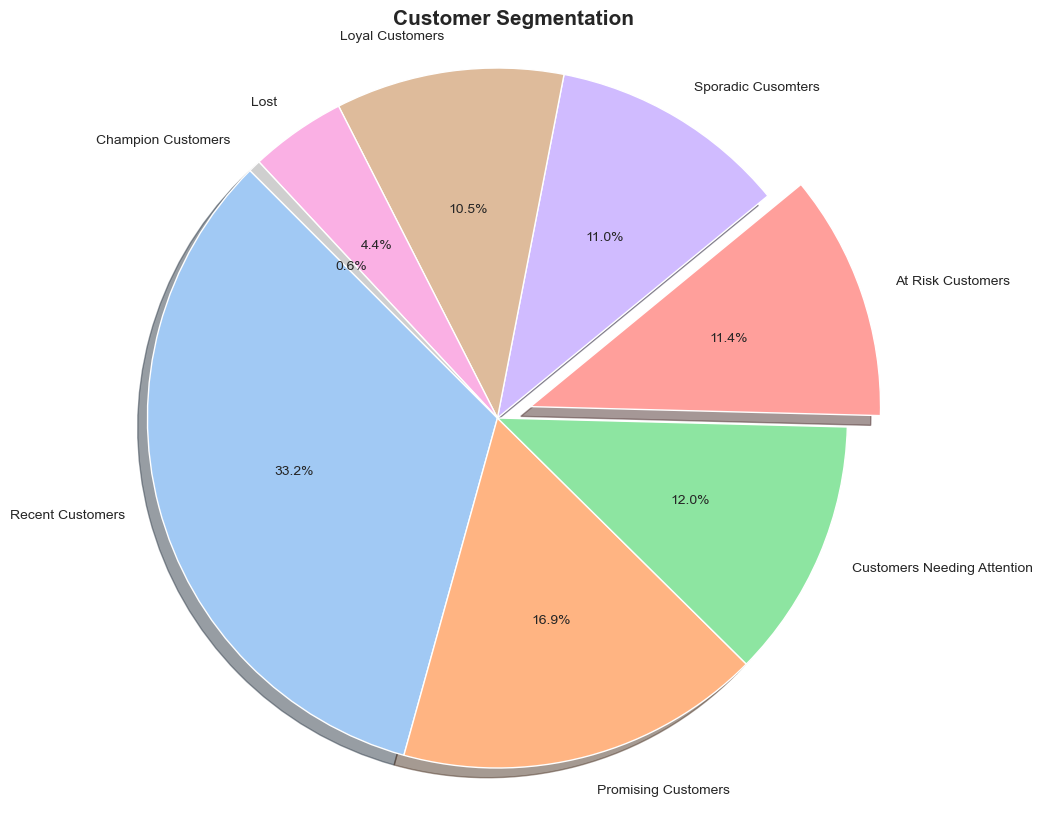

In [126]:
Customer_seg['Customer_Segmentation'].value_counts().plot.pie(
    figsize=(10, 10),
    startangle=135,
    explode=(0, 0, 0, 0.1, 0, 0, 0, 0),
    autopct='%.1f%%',
    shadow=True,
    colors=sns.color_palette("pastel")
)
plt.title("Customer Segmentation", fontsize=15, fontweight='bold')
plt.ylabel("")
plt.axis('equal')
plt.show()

### With a total of 9 customer segments, 11.4% are at risk of churn, while 11% require attention to prevent potential loss. Additionally, 4.4% of customers have already churned.

Here are our top 10 churned customers who have not made a purchase in a while.


In [129]:
churned=Customer_seg[(Customer_seg['RFM_Score']=='411')].sort_values('M_Value', ascending=False).head(10)
churned

,R_Value,F_Value,M_Value,R_Score,F_Score,M_Score,RFM_Score,RFM_Total_Score,Customer_Segmentation
Order Customer Id,,,,,,,,,
11065,309,41,18641.300091,4,1,1,411,6,Customers Needing Attention
6285,332,37,18287.010097,4,1,1,411,6,Customers Needing Attention
7892,392,29,17620.470196,4,1,1,411,6,Customers Needing Attention
2893,312,24,17536.609842,4,1,1,411,6,Customers Needing Attention
4181,425,29,17333.960094,4,1,1,411,6,Customers Needing Attention
4781,502,31,17048.380088,4,1,1,411,6,Customers Needing Attention
9271,344,35,17044.910217,4,1,1,411,6,Customers Needing Attention
4659,417,27,16973.060024,4,1,1,411,6,Customers Needing Attention
1695,326,33,16916.020176,4,1,1,411,6,Customers Needing Attention


### These customers previously ordered frequently and in large amounts, but they haven't made a purchase in nearly a year, indicating they're buying from competitors. This group should be targeted with offers to win them back.

Top 10 new best customers who place costly orders often.


In [132]:
#The R_Score should be low and F_Score, M_Score should be as high as possible
Customer_seg[(Customer_seg['RFM_Score']=='144')|(Customer_seg['RFM_Score']=='143')].sort_values('M_Value', ascending=False).head(10)

,R_Value,F_Value,M_Value,R_Score,F_Score,M_Score,RFM_Score,RFM_Total_Score,Customer_Segmentation
Order Customer Id,,,,,,,,,
18101,38,1,1500.0,1,4,3,143,8,Promising Customers
18083,39,1,1500.0,1,4,3,143,8,Promising Customers
18047,39,1,1500.0,1,4,3,143,8,Promising Customers
18065,39,1,1500.0,1,4,3,143,8,Promising Customers
18119,38,1,1500.0,1,4,3,143,8,Promising Customers
18046,39,1,1485.0,1,4,3,143,8,Promising Customers
18100,38,1,1485.0,1,4,3,143,8,Promising Customers
18118,38,1,1485.0,1,4,3,143,8,Promising Customers
18064,39,1,1485.0,1,4,3,143,8,Promising Customers


### The customers mentioned above have the potential to become loyal clients and should be targeted to foster their loyalty. Each customer segment should receive tailored advertisements and rewards to boost profits and enhance responsiveness.

# Data Modeling

# A - Comparision of Classification Models

To evaluate the performance of various models, machine learning algorithms are trained to detect fraud and late deliveries for classification tasks, while sales and order quantities are predicted for regression tasks. A new dataset is generated by creating a copy of the original data for both training and validation purposes.

In [167]:
train_data=data.copy()

Two new columns are added to indicate orders with suspected fraud and late delivery, converting them into binary classification. This transformation helps in better assessing the performance of different models.

In [170]:
train_data['fraud'] = np.where(train_data['Order Status'] == 'SUSPECTED_FRAUD', 1, 0)
train_data['late_delivery']=np.where(train_data['Delivery Status'] == 'Late delivery', 1, 0)

In [172]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180519 entries, 0 to 180518
Data columns (total 44 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Type                           180519 non-null  object 
 1   Days for shipping (real)       180519 non-null  int64  
 2   Days for shipment (scheduled)  180519 non-null  int64  
 3   Benefit per order              180519 non-null  float64
 4   Sales per customer             180519 non-null  float64
 5   Delivery Status                180519 non-null  object 
 6   Late_delivery_risk             180519 non-null  int64  
 7   Category Id                    180519 non-null  int64  
 8   Category Name                  180519 non-null  object 
 9   Customer City                  180519 non-null  object 
 10  Customer Country               180519 non-null  object 
 11  Customer Id                    180519 non-null  int64  
 12  Customer Segment              

In [174]:
#Dropping columns with repeated values
train_data.drop(['Delivery Status','Late_delivery_risk','Order Status','order date (DateOrders)'], axis=1, inplace=True)

It is important to check the type of variables in the data because machine learning models can only be trained with numerical values.

In [176]:
train_data.dtypes

Type                              object
Days for shipping (real)           int64
Days for shipment (scheduled)      int64
Benefit per order                float64
Sales per customer               float64
Category Id                        int64
Category Name                     object
Customer City                     object
Customer Country                  object
Customer Id                        int64
Customer Segment                  object
Customer State                    object
Customer Zipcode                 float64
Department Id                      int64
Department Name                   object
Market                            object
Order City                        object
Order Country                     object
Order Customer Id                  int64
Order Id                           int64
Order Item Cardprod Id             int64
Order Item Discount              float64
Order Item Discount Rate         float64
Order Item Id                      int64
Order Item Produ

There are some columns with object type data which cannot be trained in machine learning models so all the object type data is converted to int type using preprocessing label encoder library.

In [178]:
# create the Labelencoder object
le = preprocessing.LabelEncoder()
#convert the categorical columns into numeric
train_data['Customer Country']  = le.fit_transform(train_data['Customer Country'])
train_data['Market']            = le.fit_transform(train_data['Market'])
train_data['Type']              = le.fit_transform(train_data['Type'])
train_data['Product Name']      = le.fit_transform(train_data['Product Name'])
train_data['Customer Segment']  = le.fit_transform(train_data['Customer Segment'])
train_data['Customer State']    = le.fit_transform(train_data['Customer State'])
train_data['Order Region']      = le.fit_transform(train_data['Order Region'])
train_data['Order City']        = le.fit_transform(train_data['Order City'])
train_data['Category Name']     = le.fit_transform(train_data['Category Name'])
train_data['Customer City']     = le.fit_transform(train_data['Customer City'])
train_data['Department Name']   = le.fit_transform(train_data['Department Name'])
train_data['Order State']       = le.fit_transform(train_data['Order State'])
train_data['Shipping Mode']     = le.fit_transform(train_data['Shipping Mode'])
# train_data['order_week_day']    = le.fit_transform(train_data['order_week_day'])
train_data['Order Country']     = le.fit_transform(train_data['Order Country'])
train_data['Customer Full Name']= le.fit_transform(train_data['Customer Full Name'])

#display the initial records
train_data.head()

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Category Id,Category Name,Customer City,Customer Country,Customer Id,...,Order Region,Order State,Product Card Id,Product Category Id,Product Name,Product Price,Shipping Mode,Customer Full Name,fraud,late_delivery
0,1,3,4,91.250000,314.640015,73,40,66,1,20755,...,15,475,1360,73,78,327.75,3,1876,0,0
1,3,5,4,-249.089996,311.359985,73,40,66,1,19492,...,13,841,1360,73,78,327.75,3,5378,0,1
2,0,4,4,-247.779999,309.720001,73,40,452,0,19491,...,13,841,1360,73,78,327.75,3,4429,0,0
3,1,3,4,22.860001,304.809998,73,40,285,0,19490,...,11,835,1360,73,78,327.75,3,12929,0,0
4,2,2,4,134.210007,298.250000,73,40,66,1,19489,...,11,835,1360,73,78,327.75,3,10638,0,0


In [179]:
train_data.dtypes

Type                               int32
Days for shipping (real)           int64
Days for shipment (scheduled)      int64
Benefit per order                float64
Sales per customer               float64
Category Id                        int64
Category Name                      int32
Customer City                      int32
Customer Country                   int32
Customer Id                        int64
Customer Segment                   int32
Customer State                     int32
Customer Zipcode                 float64
Department Id                      int64
Department Name                    int32
Market                             int32
Order City                         int32
Order Country                      int32
Order Customer Id                  int64
Order Id                           int64
Order Item Cardprod Id             int64
Order Item Discount              float64
Order Item Discount Rate         float64
Order Item Id                      int64
Order Item Produ

The entire dataset is now converted into integer format. It is then divided into training and test datasets, allowing the model to be trained on the training data and its performance to be evaluated using the test data.

In [181]:
#All columns expect fraud
xf=train_data.loc[:, train_data.columns != 'fraud']
#Only fraud column
yf=train_data['fraud']
#Splitting the data into two parts in which 80% data will be used for training the model and 20% for testing
xf_train, xf_test,yf_train,yf_test = train_test_split(xf,yf,test_size = 0.2,random_state = 42)
#All columns expect fraud
xl=train_data.loc[:, train_data.columns != 'late_delivery']
#Only fraud column
yl=train_data['late_delivery']
#Splitting the data into two parts in which 80% data will be used for training the model and 20% for testing
xl_train, xl_test,yl_train,yl_test = train_test_split(xl,yl,test_size = 0.2, random_state = 42)

The Standard Scaler is used to standardize the data because there are various variables with different ranges, ensuring the data is internally consistent before training the machine learning model.

In [183]:
sc = StandardScaler()
xf_train=sc.fit_transform(xf_train)
xf_test=sc.transform(xf_test)
xl_train=sc.fit_transform(xl_train)
xl_test=sc.transform(xl_test)

In [184]:
np.isnan(xf_train)

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [185]:
len(xf_train)

144415

In [186]:
np.isnan(xf_test)

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [187]:
len(xf_test)

36104

In [188]:
np.isnan(xl_train)

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [194]:
len(xl_train)

144415

In [195]:
np.isnan(xl_test)

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [196]:
len(xl_test)

36104

In [197]:
np.isnan(yl_train)

116587    False
36340     False
175763    False
96918     False
71197     False
          ...  
119879    False
103694    False
131932    False
146867    False
121958    False
Name: late_delivery, Length: 144415, dtype: bool

In [198]:
np.isnan(yl_test)

80120     False
19670     False
114887    False
120110    False
56658     False
          ...  
5638      False
60559     False
168345    False
101873    False
91339     False
Name: late_delivery, Length: 36104, dtype: bool

The data is now ready for use in machine learning models. To streamline the process of comparing different models, a function is created that trains each model from scratch. The output is in binary classification format, and each model is evaluated using metrics such as accuracy score, recall score, and F1 score.

The F1 score is selected as the main evaluation metric, as it combines precision and recall into a single value by calculating their harmonic mean. All metrics are then multiplied by 100 for easier interpretation.n.

In [211]:
def classifiermodel(model_f, model_l, xf_train, xf_test, yf_train, yf_test, xl_train, xl_test, yl_train, yl_test):
    model_f = model_f.fit(xf_train, yf_train)  # Fitting train data for fraud detection
    model_l = model_l.fit(xl_train, yl_train)  # Fitting train data for prediction of late delivery
    
    yf_pred = model_f.predict(xf_test)
    yl_pred = model_l.predict(xl_test)
    
    accuracy_f = accuracy_score(yf_pred, yf_test)  # Accuracy for fraud detection
    accuracy_l = accuracy_score(yl_pred, yl_test)  # Accuracy for prediction of late delivery
    
    recall_f = recall_score(yf_pred, yf_test)  # Recall score for fraud detection
    recall_l = recall_score(yl_pred, yl_test)  # Recall score for prediction of late delivery
    
    conf_f = confusion_matrix(yf_test, yf_pred)  # Confusion matrix for fraud detection
    conf_l = confusion_matrix(yl_test, yl_pred)  # Confusion matrix for prediction of late delivery
    
    f1_f = f1_score(yf_test, yf_pred)  # F1 score for fraud detection
    f1_l = f1_score(yl_test, yl_pred)  # F1 score for prediction of late delivery
    
    print(f"Model parameters used for fraud detection: {model_f}")
    print(f"\n--- Fraud Detection Results ---")
    print(f"Accuracy of fraud detection: {accuracy_f * 100:.2f}%")
    print(f"Recall score for fraud detection: {recall_f * 100:.2f}%")
    print(f"Confusion Matrix for fraud detection:\n{conf_f}")
    print(f"F1 score for fraud detection: {f1_f * 100:.2f}%")
    
    print(f"\n--- Late Delivery Prediction Results ---")
    print(f"Accuracy of late delivery prediction: {accuracy_l * 100:.2f}%")
    print(f"Recall score for late delivery prediction: {recall_l * 100:.2f}%")
    print(f"Confusion Matrix for late delivery prediction:\n{conf_l}")
    print(f"F1 score for late delivery prediction: {f1_l * 100:.2f}%")

# 1 - Logistic Classification Model


In [214]:
model_f = LogisticRegression(solver='lbfgs',random_state=0) #the classification model
model_l = LogisticRegression(solver='lbfgs',random_state=0) #the classification model
#Giving inputs to the defined function
classifiermodel(model_f,model_l,xf_train, xf_test,yf_train,yf_test,xl_train, xl_test,yl_train,yl_test)

Model parameters used for fraud detection: LogisticRegression(random_state=0)

--- Fraud Detection Results ---
Accuracy of fraud detection: 97.79%
Recall score for fraud detection: 57.89%
Confusion Matrix for fraud detection:
[[35118   136]
 [  663   187]]
F1 score for fraud detection: 31.88%

--- Late Delivery Prediction Results ---
Accuracy of late delivery prediction: 98.85%
Recall score for late delivery prediction: 97.94%
Confusion Matrix for late delivery prediction:
[[15891   416]
 [    0 19797]]
F1 score for late delivery prediction: 98.96%


# 2 - Gaussian Naive Bayes Classification Model 

In [216]:
model_f = GaussianNB()
model_l = GaussianNB()
classifiermodel(model_f,model_l,xf_train, xf_test,yf_train,yf_test,xl_train, xl_test,yl_train,yl_test)

Model parameters used for fraud detection: GaussianNB()

--- Fraud Detection Results ---
Accuracy of fraud detection: 87.85%
Recall score for fraud detection: 16.23%
Confusion Matrix for fraud detection:
[[30867  4387]
 [    0   850]]
F1 score for fraud detection: 27.93%

--- Late Delivery Prediction Results ---
Accuracy of late delivery prediction: 57.27%
Recall score for late delivery prediction: 56.20%
Confusion Matrix for late delivery prediction:
[[  882 15425]
 [    3 19794]]
F1 score for late delivery prediction: 71.96%


# 3 - Support Vector Machines Classification

In [218]:
model_f = svm.LinearSVC()
model_l = svm.LinearSVC()
classifiermodel(model_f,model_l,xf_train, xf_test,yf_train,yf_test,xl_train, xl_test,yl_train,yl_test)

Model parameters used for fraud detection: LinearSVC()

--- Fraud Detection Results ---
Accuracy of fraud detection: 97.73%
Recall score for fraud detection: 55.59%
Confusion Matrix for fraud detection:
[[35127   127]
 [  691   159]]
F1 score for fraud detection: 27.99%

--- Late Delivery Prediction Results ---
Accuracy of late delivery prediction: 98.85%
Recall score for late delivery prediction: 97.94%
Confusion Matrix for late delivery prediction:
[[15891   416]
 [    0 19797]]
F1 score for late delivery prediction: 98.96%


# 4 - K-nearest Neighbors Classification Model

In [222]:
model_f = KNeighborsClassifier(n_neighbors=1)
model_l = KNeighborsClassifier(n_neighbors=1)
classifiermodel(model_f,model_l,xf_train, xf_test,yf_train,yf_test,xl_train, xl_test,yl_train,yl_test)

Model parameters used for fraud detection: KNeighborsClassifier(n_neighbors=1)

--- Fraud Detection Results ---
Accuracy of fraud detection: 97.18%
Recall score for fraud detection: 36.61%
Confusion Matrix for fraud detection:
[[34854   400]
 [  619   231]]
F1 score for fraud detection: 31.20%

--- Late Delivery Prediction Results ---
Accuracy of late delivery prediction: 81.63%
Recall score for late delivery prediction: 83.95%
Confusion Matrix for late delivery prediction:
[[13196  3111]
 [ 3522 16275]]
F1 score for late delivery prediction: 83.07%


# 5 - Linear Discriminant Analysis Classification

In [224]:
model_f = LinearDiscriminantAnalysis()
model_l = LinearDiscriminantAnalysis()
classifiermodel(model_f,model_l,xf_train, xf_test,yf_train,yf_test,xl_train, xl_test,yl_train,yl_test)

Model parameters used for fraud detection: LinearDiscriminantAnalysis()

--- Fraud Detection Results ---
Accuracy of fraud detection: 97.88%
Recall score for fraud detection: 56.68%
Confusion Matrix for fraud detection:
[[34975   279]
 [  485   365]]
F1 score for fraud detection: 48.86%

--- Late Delivery Prediction Results ---
Accuracy of late delivery prediction: 97.91%
Recall score for late delivery prediction: 97.71%
Confusion Matrix for late delivery prediction:
[[15851   456]
 [  300 19497]]
F1 score for late delivery prediction: 98.10%


# 6 - Random Forest Classification

In [226]:
model_f = RandomForestClassifier()
model_l = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=0)
classifiermodel(model_f,model_l,xf_train, xf_test,yf_train,yf_test,xl_train, xl_test,yl_train,yl_test)

Model parameters used for fraud detection: RandomForestClassifier()

--- Fraud Detection Results ---
Accuracy of fraud detection: 98.67%
Recall score for fraud detection: 97.44%
Confusion Matrix for fraud detection:
[[35244    10]
 [  470   380]]
F1 score for fraud detection: 61.29%

--- Late Delivery Prediction Results ---
Accuracy of late delivery prediction: 98.85%
Recall score for late delivery prediction: 97.94%
Confusion Matrix for late delivery prediction:
[[15891   416]
 [    0 19797]]
F1 score for late delivery prediction: 98.96%


# 7 - Extra Trees Classification

In [228]:
model_f = ExtraTreesClassifier(n_estimators=100, max_depth=None,random_state=0)
model_l = ExtraTreesClassifier(n_estimators=100, max_depth=None,random_state=0)
classifiermodel(model_f,model_l,xf_train, xf_test,yf_train,yf_test,xl_train, xl_test,yl_train,yl_test)

Model parameters used for fraud detection: ExtraTreesClassifier(random_state=0)

--- Fraud Detection Results ---
Accuracy of fraud detection: 98.62%
Recall score for fraud detection: 98.61%
Confusion Matrix for fraud detection:
[[35249     5]
 [  494   356]]
F1 score for fraud detection: 58.79%

--- Late Delivery Prediction Results ---
Accuracy of late delivery prediction: 99.03%
Recall score for late delivery prediction: 98.27%
Confusion Matrix for late delivery prediction:
[[15958   349]
 [    1 19796]]
F1 score for late delivery prediction: 99.12%


# 8 - eXtreme Gradient Boosting Classification

In [230]:
model_f = xgb.XGBClassifier()
model_l = xgb.XGBClassifier()
classifiermodel(model_f,model_l,xf_train, xf_test,yf_train,yf_test,xl_train, xl_test,yl_train,yl_test)

Model parameters used for fraud detection: XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

--- Fraud Detection Results ---
Accuracy of fraud detection: 98.91%
Recall score for fraud detection: 91.02%
Confusion Matrix for fraud detection:
[[35204    50]
 [  343   507]]
F1 score for fraud d

# 9 - Decision Trees Classification

In [232]:
model_f = tree.DecisionTreeClassifier()
model_l = tree.DecisionTreeClassifier()
classifiermodel(model_f,model_l,xf_train, xf_test,yf_train,yf_test,xl_train, xl_test,yl_train,yl_test)

Model parameters used for fraud detection: DecisionTreeClassifier()

--- Fraud Detection Results ---
Accuracy of fraud detection: 99.06%
Recall score for fraud detection: 81.48%
Confusion Matrix for fraud detection:
[[35104   150]
 [  190   660]]
F1 score for fraud detection: 79.52%

--- Late Delivery Prediction Results ---
Accuracy of late delivery prediction: 99.25%
Recall score for late delivery prediction: 99.37%
Confusion Matrix for late delivery prediction:
[[16182   125]
 [  145 19652]]
F1 score for late delivery prediction: 99.32%


# 10 - Bagging Classification

P.S. - Not taking into consideration, since it has no Feature Importance extracting properties. But it performs really well in comparison to other models.

In [286]:
model_f = BaggingClassifier()
model_l = BaggingClassifier()
classifiermodel(model_f,model_l,xf_train, xf_test,yf_train,yf_test,xl_train, xl_test,yl_train,yl_test)

Model parameters used for fraud detection: BaggingClassifier()

--- Fraud Detection Results ---
Accuracy of fraud detection: 99.12%
Recall score for fraud detection: 94.05%
Confusion Matrix for fraud detection:
[[35218    36]
 [  281   569]]
F1 score for fraud detection: 78.21%

--- Late Delivery Prediction Results ---
Accuracy of late delivery prediction: 99.48%
Recall score for late delivery prediction: 99.13%
Confusion Matrix for late delivery prediction:
[[16134   173]
 [   13 19784]]
F1 score for late delivery prediction: 99.53%


# Classification Metrics Analysis

In [252]:
classification_data = {
    'Classification Model': [
        'Logistic', 'Gaussian Naive Bayes', 'Support Vector Machines', 'K-nearest Neighbour',
        'Linear Discriminant Analysis', 'Random Forest', 'Extra Trees', 'eXtreme Gradient Boosting', 
        'Decision Tree'
    ],
    'Accuracy Score for Fraud Detection': [
        97.79, 87.85, 97.73, 97.18, 97.88, 98.67, 98.62, 98.91, 99.06
    ],
    'Recall Score for Fraud Detection': [
        57.89, 16.23, 55.59, 36.61, 56.68, 97.74, 98.61, 91.02, 81.48
    ],
    'F1 Score for Fraud Detection': [
        31.88, 27.93, 27.99, 31.20, 48.86, 61.29, 58.79, 72.07, 79.52
    ],
    'Accuracy Score for Late Delivery': [
        98.85, 57.27, 98.85, 81.63, 97.91, 98.85, 99.03, 99.13, 99.25
    ],
    'Recall Score for Late Delivery': [
        97.94, 56.20, 97.94, 83.95, 97.71, 97.94, 98.27, 98.45, 99.37
    ],
    'F1 Score for Late Delivery': [
        98.96, 71.96, 98.96, 83.07, 98.10, 98.96, 99.12, 99.21, 99.32
    ]
}

classification_comparision = pd.DataFrame(classification_data, columns=[
    'Classification Model', 'Accuracy Score for Fraud Detection', 'Recall Score for Fraud Detection',
    'F1 Score for Fraud Detection', 'Accuracy Score for Late Delivery', 'Recall Score for Late Delivery', 
    'F1 Score for Late Delivery'
])

classification_comparision

,Classification Model,Accuracy Score for Fraud Detection,Recall Score for Fraud Detection,F1 Score for Fraud Detection,Accuracy Score for Late Delivery,Recall Score for Late Delivery,F1 Score for Late Delivery
0,Logistic,97.79,57.89,31.88,98.85,97.94,98.96
1,Gaussian Naive Bayes,87.85,16.23,27.93,57.27,56.20,71.96
2,Support Vector Machines,97.73,55.59,27.99,98.85,97.94,98.96
3,K-nearest Neighbour,97.18,36.61,31.20,81.63,83.95,83.07
4,Linear Discriminant Analysis,97.88,56.68,48.86,97.91,97.71,98.10
5,Random Forest,98.67,97.74,61.29,98.85,97.94,98.96
6,Extra Trees,98.62,98.61,58.79,99.03,98.27,99.12
7,eXtreme Gradient Boosting,98.91,91.02,72.07,99.13,98.45,99.21
8,Decision Tree,99.06,81.48,79.52,99.25,99.37,99.32


In [254]:
classification_comparision.max() #Checking max values in every column

Classification Model                  eXtreme Gradient Boosting
Accuracy Score for Fraud Detection                        99.06
Recall Score for Fraud Detection                          98.61
F1 Score for Fraud Detection                              79.52
Accuracy Score for Late Delivery                          99.25
Recall Score for Late Delivery                            99.37
F1 Score for Late Delivery                                99.32
dtype: object

* The maximum ***Accuracy Score for Fraud Detection*** is ***99.06***, achieved by the ***Decision Tree model***.
* The maximum ***Recall Score for Fraud Detection*** is ***98.61***, achieved by the ***Extra Trees model***.
* The maximum ***F1 Score for Fraud Detection*** is ***79.52***, achieved by the ***Decision Tree model***.
* The maximum ***Accuracy Score for Late Delivery*** is ***99.25***, achieved by the ***Decision Tree model***.
* The maximum ***Recall Score for Late Delivery*** is ***99.37***, achieved by the ***Decision Tree model***.
* The maximum ***F1 Score for Late Delivery*** is ***99.32***, achieved by the ***Decision Tree model***.

Based on the F1 score, it is evident that the Decision Tree classifier outperforms other models for classification tasks, achieving nearly 79.52% for fraud detection and 99.32% for late delivery. To ensure the model's predictions are reliable, it has been cross-validated, and the results were compared against the model's accuracy.

In [238]:
#Defining cross validation model
def cross_validation_model(model_f,model_l,xf,yf,xl,yl):
    model_f= model_f.fit(xf,yf)
    model_l = model_l.fit(xl,yl)
    scores_f = cross_val_score(model_f, xf, yf, cv=6)
    scores_l = cross_val_score(model_l, xl, yl, cv=6)
    print('Model used is',model_f)
    print('Cross validation accuracy of fraud: %0.2f (+/- %0.2f)' % (scores_f.mean(), scores_f.std() * 2))
    print('Cross validation accuracy of late : %0.2f (+/- %0.2f)' % (scores_l.mean(), scores_l.std() * 2))

In [239]:
cross_validation_model(model_f,model_l,xf,yf,xl,yl)

Model used is DecisionTreeClassifier()
Cross validation accuracy of fraud: 0.96 (+/- 0.05)
Cross validation accuracy of late : 0.98 (+/- 0.02)


# Feature Importance

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38],
 [Text(0, 0, 'Days for shipping (real)'),
  Text(1, 0, 'Customer Full Name'),
  Text(2, 0, 'late_delivery'),
  Text(3, 0, 'Shipping Mode'),
  Text(4, 0, 'Order City'),
  Text(5, 0, 'Type'),
  Text(6, 0, 'Order State'),
  Text(7, 0, 'Customer City'),
  Text(8, 0, 'Customer Id'),
  Text(9, 0, 'Order Customer Id'),
  Text(10, 0, 'Order Item Id'),
  Text(11, 0, 'Customer Zipcode'),
  Text(12, 0, 'Order Id'),
  Text(13, 0, 'Order Country'),
  Text(14, 0, 'Order Region'),
  Text(15, 0, 'Customer State'),
  Text(16, 0, 'Customer Segment'),
  Text(17, 0, 'Market'),
  Text(18, 0, 'Order Item Profit Ratio'),
  Text(19, 0, 'Order Item Discount'),
  Text(20, 0, 'Benefit per order'),
  Text(21, 0, 'Order Profit Per Order'),
  Text(22, 0, 'Order Item Discount Rate'),
  Text(23, 

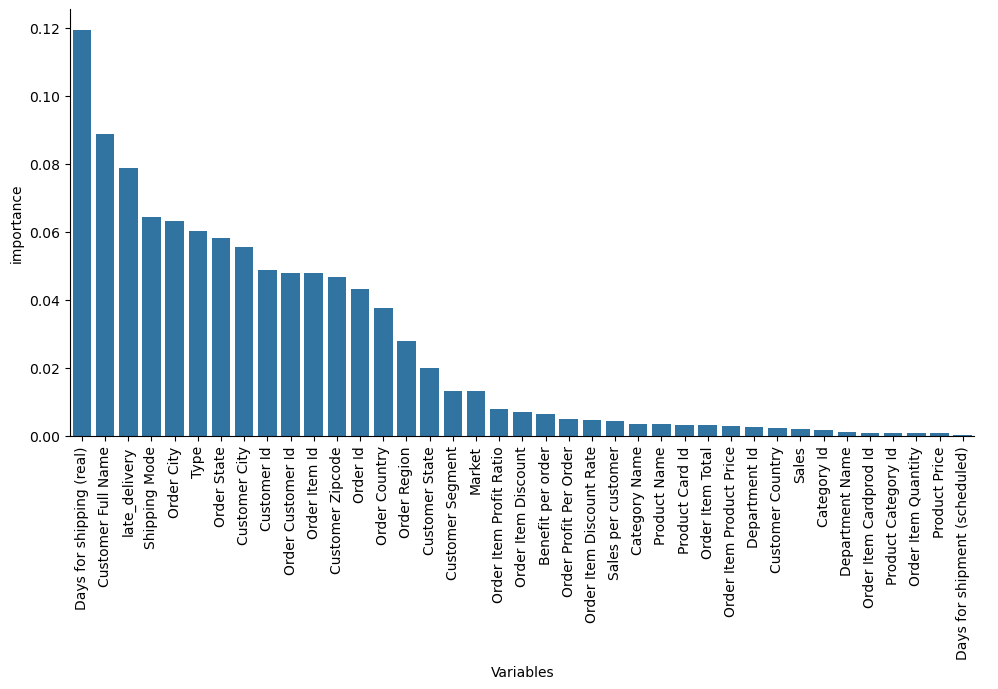

In [258]:
important_col=model_f.feature_importances_.argsort()
feat_imp=pd.DataFrame({'Variables':xf.columns[important_col],'importance':model_f.feature_importances_[important_col]})
feat_imp=feat_imp.sort_values(by='importance',ascending=False)
ax = sns.catplot(x='Variables', y = 'importance', data=feat_imp, height=5, aspect=2,  kind="bar")
plt.xticks(rotation=90)

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38],
 [Text(0, 0, 'Days for shipping (real)'),
  Text(1, 0, 'Days for shipment (scheduled)'),
  Text(2, 0, 'fraud'),
  Text(3, 0, 'Shipping Mode'),
  Text(4, 0, 'Order City'),
  Text(5, 0, 'Customer Full Name'),
  Text(6, 0, 'Order Item Id'),
  Text(7, 0, 'Customer Id'),
  Text(8, 0, 'Order State'),
  Text(9, 0, 'Order Customer Id'),
  Text(10, 0, 'Customer Zipcode'),
  Text(11, 0, 'Type'),
  Text(12, 0, 'Order Id'),
  Text(13, 0, 'Customer City'),
  Text(14, 0, 'Order Country'),
  Text(15, 0, 'Customer State'),
  Text(16, 0, 'Customer Segment'),
  Text(17, 0, 'Order Region'),
  Text(18, 0, 'Order Item Discount'),
  Text(19, 0, 'Order Item Profit Ratio'),
  Text(20, 0, 'Market'),
  Text(21, 0, 'Benefit per order'),
  Text(22, 0, 'Order Profit Per Order'),
  Text(23, 0, 

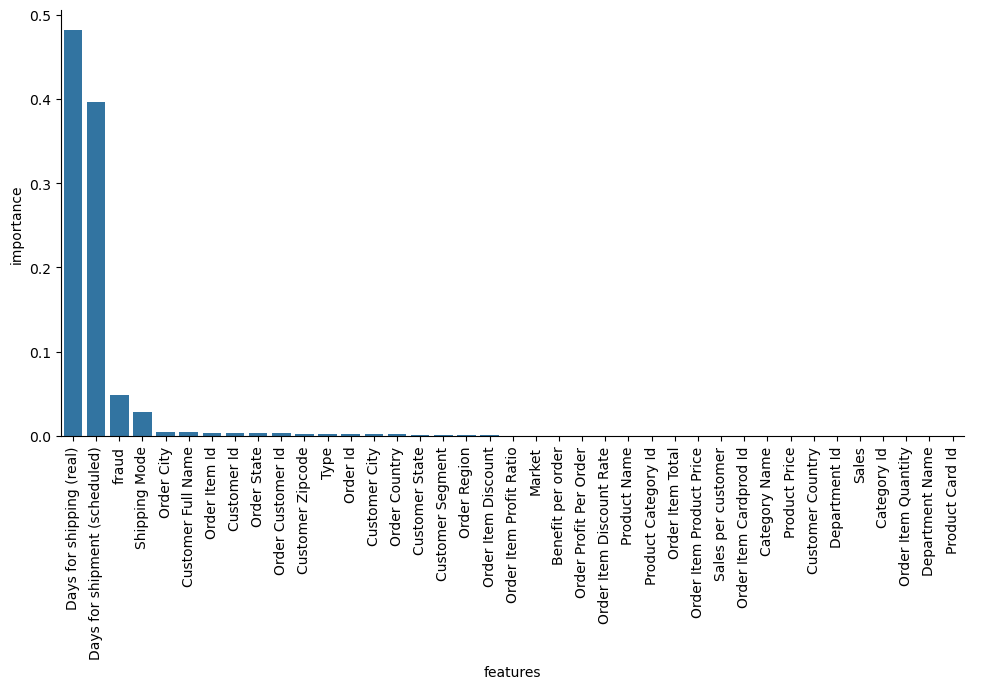

In [260]:
important_col=model_l.feature_importances_.argsort()
feat_imp=pd.DataFrame({'features':xl.columns[important_col],'importance':model_l.feature_importances_[important_col]})
feat_imp=feat_imp.sort_values(by='importance',ascending=False)
ax = sns.catplot(x='features', y = 'importance', data=feat_imp, height=5, aspect=2,  kind="bar")
plt.xticks(rotation=90)

In [262]:
new_data=train_data.copy()

In [264]:
# Dropping columns in new data set
new_data=new_data.drop(['Days for shipping (real)','Days for shipment (scheduled)'],axis=1)

In [266]:
#All columns expect fraud
new_xl=new_data.loc[:, new_data.columns != 'late_delivery']
#Only fraud column
new_yl=train_data['late_delivery']
#Splitting the data into two parts in which 80% data will be used for training the model and 20% for testing
new_xl_train, new_xl_test,new_yl_train,new_yl_test = train_test_split(new_xl,new_yl,test_size = 0.2,random_state = 42)

In [268]:
new_xl_train=sc.fit_transform(new_xl_train)
new_xl_test=sc.transform(new_xl_test)

In [270]:
def New_classifiermodel(model_c, xc_train, xc_test, yc_train, yc_test):
    # Fitting the model on the training data
    model_c = model_c.fit(xc_train, yc_train)
    
    # Predicting the target values for the test data
    yc_pred = model_c.predict(xc_test)  
    
    # Calculating the evaluation metrics
    accuracy_c = accuracy_score(yc_pred, yc_test)  # Accuracy
    recall_c = recall_score(yc_pred, yc_test, average='weighted')  # Weighted Recall score
    conf_c = confusion_matrix(yc_test, yc_pred)  # Confusion Matrix
    f1_c = f1_score(yc_test, yc_pred, average='weighted')  # Weighted F1 score
    
    # Printing out the results with enhanced clarity and formatting
    print(f"Model Parameters Used: {model_c}")
    print("\n--- Model Evaluation Results ---")
    
    print(f"Accuracy of the model: {accuracy_c * 100:.2f}%")
    print(f"Recall Score (Weighted): {recall_c * 100:.2f}%")
    print(f"Confusion Matrix:\n{conf_c}")
    print(f"F1 Score (Weighted): {f1_c * 100:.2f}%")

In [272]:
new_model_l=tree.DecisionTreeClassifier()
New_classifiermodel(new_model_l,new_xl_train, new_xl_test,new_yl_train,new_yl_test)

Model Parameters Used: DecisionTreeClassifier()

--- Model Evaluation Results ---
Accuracy of the model: 82.28%
Recall Score (Weighted): 82.28%
Confusion Matrix:
[[13060  3247]
 [ 3151 16646]]
F1 Score (Weighted): 82.27%


([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36],
 [Text(0, 0, 'Shipping Mode'),
  Text(1, 0, 'Customer Full Name'),
  Text(2, 0, 'Order City'),
  Text(3, 0, 'Order State'),
  Text(4, 0, 'Order Item Id'),
  Text(5, 0, 'Customer Id'),
  Text(6, 0, 'Order Id'),
  Text(7, 0, 'Order Customer Id'),
  Text(8, 0, 'Customer City'),
  Text(9, 0, 'Customer Zipcode'),
  Text(10, 0, 'Order Country'),
  Text(11, 0, 'fraud'),
  Text(12, 0, 'Customer State'),
  Text(13, 0, 'Order Region'),
  Text(14, 0, 'Order Item Discount'),
  Text(15, 0, 'Order Item Profit Ratio'),
  Text(16, 0, 'Customer Segment'),
  Text(17, 0, 'Type'),
  Text(18, 0, 'Order Profit Per Order'),
  Text(19, 0, 'Benefit per order'),
  Text(20, 0, 'Sales per customer'),
  Text(21, 0, 'Order Item Discount Rate'),
  Text(22, 0, 'Order Item Total'),
  Text(23, 0, 'Market'),
  

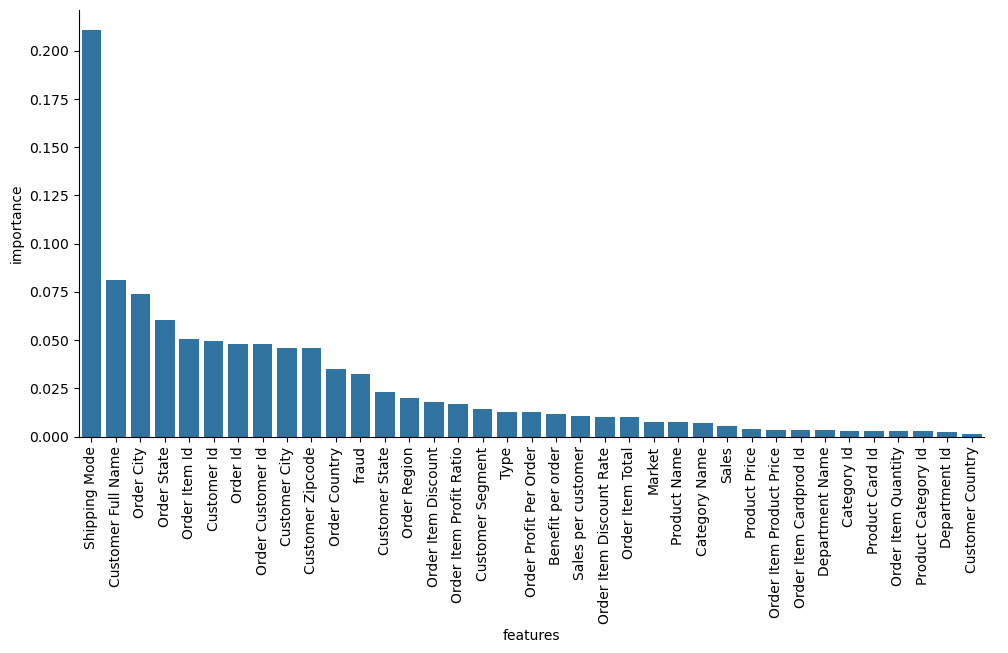

In [273]:
important_col=new_model_l.feature_importances_.argsort()
feat_imp=pd.DataFrame({'features':new_xl.columns[important_col],'importance':new_model_l.feature_importances_[important_col]})
feat_imp=feat_imp.sort_values(by='importance',ascending=False)
ax = sns.catplot(x='features', y = 'importance', data=feat_imp, height=5, aspect=2,  kind="bar")
plt.xticks(rotation=90)

In [274]:
#All columns expect order country
xc=train_data.loc[:, train_data.columns != 'Order Country']
#Order column country
yc=train_data['Order Country']
#Splitting 20% of dataset as test data 
xc_train, xc_test,yc_train,yc_test = train_test_split(xc,yc,test_size = 0.2, random_state = 42)

In [275]:
xc_train=sc.fit_transform(xc_train)
xc_test=sc.transform(xc_test)

In [276]:
model_c=tree.DecisionTreeClassifier()
New_classifiermodel(model_c,xc_train, xc_test,yc_train,yc_test)

Model Parameters Used: DecisionTreeClassifier()

--- Model Evaluation Results ---
Accuracy of the model: 99.81%
Recall Score (Weighted): 99.81%
Confusion Matrix:
[[  37    0    0 ...    0    0    0]
 [   0    7    0 ...    0    0    0]
 [   0    0 1929 ...    0    0    0]
 ...
 [   0    0    0 ...    4    0    0]
 [   0    0    0 ...    0   46    0]
 [   0    0    0 ...    0    0   47]]
F1 Score (Weighted): 99.81%


Decision Tree classifier is identified as the best model in all Machine learning models for Classification Type data. How well it can perform when compared with Neural Network model?

# A.1 - Neural Network Model - Classification

In [336]:
keras.layers.BatchNormalization()
classifier = Sequential()
#First Hidden Layer
classifier.add(Dense(1024, activation='relu',kernel_initializer='random_normal', input_dim=39)) #Since we have 39 columns
#Third Hidden Layer
classifier.add(Dense(512, activation='relu',kernel_initializer='random_normal'))
#Fourth Hidden Layer
classifier.add(Dense(256, activation='relu',kernel_initializer='random_normal'))
#Fifth Hidden Layer
classifier.add(Dense(128, activation='relu',kernel_initializer='random_normal'))
#Sixth Hidden Layer
classifier.add(Dense(64, activation='relu',kernel_initializer='random_normal'))
#Seventh Hidden Layer
classifier.add(Dense(32, activation='relu',kernel_initializer='random_normal'))
#Eight Hidden Layer
classifier.add(Dense(16, activation='relu',kernel_initializer='random_normal'))
#Ninth Hidden Layer
classifier.add(Dense(8, activation='relu',kernel_initializer='random_normal'))
#Tenth Hidden Layer
classifier.add(Dense(4, activation='relu',kernel_initializer='random_normal'))
#Eleventh Hidden Layer
classifier.add(Dense(2, activation='relu',kernel_initializer='random_normal'))
#Output Layer
classifier.add(Dense(1, activation='sigmoid',kernel_initializer='random_normal'))

In [338]:
classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [340]:
#Fitting the data to the training dataset
classifier.fit(xf_train,yf_train, batch_size=512, epochs=10)

Epoch 1/10
283/283 ━━━━━━━━━━━━━━━━━━━━ 8s 15ms/step - accuracy: 0.9778 - loss: 0.6608
Epoch 2/10
283/283 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - accuracy: 0.9781 - loss: 0.5459
Epoch 3/10
283/283 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - accuracy: 0.9775 - loss: 0.4555
Epoch 4/10
283/283 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - accuracy: 0.9772 - loss: 0.3843
Epoch 5/10
283/283 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - accuracy: 0.9776 - loss: 0.3279
Epoch 6/10
283/283 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - accuracy: 0.9773 - loss: 0.2840
Epoch 7/10
283/283 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - accuracy: 0.9783 - loss: 0.2477
Epoch 8/10
283/283 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - accuracy: 0.9779 - loss: 0.2203
Epoch 9/10
283/283 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - accuracy: 0.9780 - loss: 0.1977
Epoch 10/10
283/283 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - accuracy: 0.9778 - loss: 0.1799


It is evident that the neural network model is improving with each epoch. While the accuracy remains the same, the loss decreases progressively. Since the results of each cell are saved in the Jupyter notebook, the model is further trained for 30 additional epochs, and the updated results are displayed.

In [344]:
classifier.fit(xf_train,yf_train, batch_size=512, epochs=30)

Epoch 1/30
283/283 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - accuracy: 0.9775 - loss: 0.0532
Epoch 2/30
283/283 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - accuracy: 0.9780 - loss: 0.0503
Epoch 3/30
283/283 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - accuracy: 0.9779 - loss: 0.0490
Epoch 4/30
283/283 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - accuracy: 0.9782 - loss: 0.0499
Epoch 5/30
283/283 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - accuracy: 0.9774 - loss: 0.0496
Epoch 6/30
283/283 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - accuracy: 0.9774 - loss: 0.0477
Epoch 7/30
283/283 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - accuracy: 0.9774 - loss: 0.0460
Epoch 8/30
283/283 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - accuracy: 0.9782 - loss: 0.0438
Epoch 9/30
283/283 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - accuracy: 0.9783 - loss: 0.0420
Epoch 10/30
283/283 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - accuracy: 0.9779 - loss: 0.0410
Epoch 11/30
283/283 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - accuracy: 0.9785 - loss: 0.0386
Epoch 12/30
283/283 ━━━━━━━━━━━━━━━━━━━━ 

The model is evaluated with test data set.

In [350]:
train_evaluate=classifier.evaluate(xf_train, yf_train)
test_evaluate=classifier.evaluate(xf_test, yf_test)
print('Accuracy for Train set is',train_evaluate)
print('Accuracy for Test set is',test_evaluate)# evaluation of model.
yf_pred1=classifier.predict(xf_test,batch_size=512,verbose=1)
yf_pred=np.argmax(yf_pred1,axis=1)
print(f1_score(yf_test,yf_pred,average="weighted"))

4513/4513 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.9912 - loss: 0.0177
1129/1129 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9809 - loss: 0.0807
Accuracy for Train set is [0.017810435965657234, 0.9914690256118774]
Accuracy for Test set is [0.0957777351140976, 0.9799191355705261]
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step
0.9648255733921929


The f1 score for neural network model is 96.48% which is pretty high and better when compared with decision tree f1 score which was 80.64%. But comparing accuracy scores it can concluded that even machine learning models did pretty good for fraud detection and late delivery prediction.

# B - Comparision of Regression Models

To compare the regression models, both sales and order quantity are predicted.

In [77]:
xs=train_data.loc[:, train_data.columns != 'Sales']
ys=train_data['Sales']
xs_train, xs_test,ys_train,ys_test = train_test_split(xs,ys,test_size = 0.3, random_state = 42)
xq=train_data.loc[:, train_data.columns != 'Order Item Quantity']
yq=train_data['Order Item Quantity']
xq_train, xq_test,yq_train,yq_test = train_test_split(xq,yq,test_size = 0.3, random_state = 42)

MinMaxScaler is used to standardize data since data type is regression.



In [79]:
scaler=MinMaxScaler()
xs_train=scaler.fit_transform(xs_train)
xs_test=scaler.transform(xs_test)
xq_train=scaler.fit_transform(xq_train)
xq_test=scaler.transform(xq_test)

The data is now ready for use in machine learning models. Since multiple models are being compared, a function has been defined to streamline the process. As the task involves regression, accuracy is not a suitable metric for comparison, unlike in classification models. Instead, the models are evaluated using **Mean Absolute Error (MAE)** and **Root Mean Squared Error (RMSE)**.

A **lower MAE** indicates better model performance, as it reflects smaller prediction errors. Similarly, a **lower RMSE** suggests a better model fit, as it gives more weight to larger errors, making it a more sensitive measure of prediction accuracy.

In [118]:
def regressionmodel(model_s, model_q, xs_train, xs_test, ys_train, ys_test, xq_train, xq_test, yq_train, yq_test):
    # Fitting the models for sales and order quantity prediction
    model_s = model_s.fit(xs_train, ys_train)  # Fitting model for sales prediction
    model_q = model_q.fit(xq_train, yq_train)  # Fitting model for order quantity prediction
    
    # Predicting sales and order quantity using the test data
    ys_pred = model_s.predict(xs_test)  # Predicting sales
    yq_pred = model_q.predict(xq_test)  # Predicting order quantity
    
    # Printing the model parameters for transparency
    print(f"Model parameters used for sales prediction: {model_s}")
    print(f"Model parameters used for order quantity prediction: {model_q}")
    
    print("\n--- Model Evaluation Results ---")
    
    # Calculating and printing the evaluation metrics for sales prediction
    mae_sales = metrics.mean_absolute_error(ys_test, ys_pred)
    rmse_sales = np.sqrt(metrics.mean_squared_error(ys_test, ys_pred))
    print(f"Mean Absolute Error (MAE) for sales prediction: {mae_sales:.6f}")
    print(f"Root Mean Squared Error (RMSE) for sales prediction: {rmse_sales:.6f}")
    
    # Calculating and printing the evaluation metrics for order quantity prediction
    mae_quantity = metrics.mean_absolute_error(yq_test, yq_pred)
    rmse_quantity = np.sqrt(metrics.mean_squared_error(yq_test, yq_pred))
    print(f"Mean Absolute Error (MAE) for order quantity prediction: {mae_quantity:.6f}")
    print(f"Root Mean Squared Error (RMSE) for order quantity prediction: {rmse_quantity:.6f}")

# 1 - Lasso Regression

In [121]:
model_s = linear_model.Lasso(alpha=0.1)
model_q = linear_model.Lasso(alpha=0.1)
regressionmodel(model_s,model_q,xs_train, xs_test,ys_train,ys_test,xq_train, xq_test,yq_train,yq_test)

Model parameters used for sales prediction: Lasso(alpha=0.1)
Model parameters used for order quantity prediction: Lasso(alpha=0.1)

--- Model Evaluation Results ---
Mean Absolute Error (MAE) for sales prediction: 1.337426
Root Mean Squared Error (RMSE) for sales prediction: 2.095162
Mean Absolute Error (MAE) for order quantity prediction: 1.253982
Root Mean Squared Error (RMSE) for order quantity prediction: 1.435849


# 2 - Ridge Regression

In [124]:
model_s = Ridge(alpha=1.0)
model_q = Ridge(alpha=1.0)
regressionmodel(model_s,model_q,xs_train, xs_test,ys_train,ys_test,xq_train, xq_test,yq_train,yq_test)

Model parameters used for sales prediction: Ridge()
Model parameters used for order quantity prediction: Ridge()

--- Model Evaluation Results ---
Mean Absolute Error (MAE) for sales prediction: 0.269265
Root Mean Squared Error (RMSE) for sales prediction: 0.473015
Mean Absolute Error (MAE) for order quantity prediction: 0.340329
Root Mean Squared Error (RMSE) for order quantity prediction: 0.525778


# 3 - Light Gradient Boosting Regression

In [127]:
model_s = lgb.LGBMRegressor()
model_q = lgb.LGBMRegressor()
regressionmodel(model_s,model_q,xs_train, xs_test,ys_train,ys_test,xq_train, xq_test,yq_train,yq_test)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002520 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4665
[LightGBM] [Info] Number of data points in the train set: 126363, number of used features: 39
[LightGBM] [Info] Start training from score 203.557248
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002103 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4853
[LightGBM] [Info] Number of data points in the train set: 126363, number of used features: 39
[LightGBM] [Info] Start training from score 2.132286
Model parameters used for sales prediction: LGBMRegressor()
Model parameters used for order quantity prediction: LGBMRegressor()

--- Model Evaluation Results ---
Mean Absolute Error (

# 4 - Random Forest Regression

In [130]:
model_s = RandomForestRegressor(n_estimators=100,max_depth=10, random_state=40)
model_q = RandomForestRegressor(n_estimators=100,max_depth=10, random_state=40)
regressionmodel(model_s,model_q,xs_train, xs_test,ys_train,ys_test,xq_train, xq_test,yq_train,yq_test)

Model parameters used for sales prediction: RandomForestRegressor(max_depth=10, random_state=40)
Model parameters used for order quantity prediction: RandomForestRegressor(max_depth=10, random_state=40)

--- Model Evaluation Results ---
Mean Absolute Error (MAE) for sales prediction: 0.202989
Root Mean Squared Error (RMSE) for sales prediction: 1.951588
Mean Absolute Error (MAE) for order quantity prediction: 0.000076
Root Mean Squared Error (RMSE) for order quantity prediction: 0.006126


# 5 - eXtreme Gradient Boosting Regression

In [132]:
model_s = xgb.XGBRegressor()
model_q = xgb.XGBRegressor()
regressionmodel(model_s,model_q,xs_train, xs_test,ys_train,ys_test,xq_train, xq_test,yq_train,yq_test)

Model parameters used for sales prediction: XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)
Model parameters used for order quantity prediction: XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, 

# 6 - Decision Tree Regression

In [134]:
model_s = tree.DecisionTreeRegressor()
model_q = tree.DecisionTreeRegressor()
regressionmodel(model_s,model_q,xs_train, xs_test,ys_train,ys_test,xq_train, xq_test,yq_train,yq_test)

Model parameters used for sales prediction: DecisionTreeRegressor()
Model parameters used for order quantity prediction: DecisionTreeRegressor()

--- Model Evaluation Results ---
Mean Absolute Error (MAE) for sales prediction: 0.010847
Root Mean Squared Error (RMSE) for sales prediction: 0.784462
Mean Absolute Error (MAE) for order quantity prediction: 0.000000
Root Mean Squared Error (RMSE) for order quantity prediction: 0.000000


# 7 - Linear Regression

In [136]:
model_s=LinearRegression()
model_q=LinearRegression()
regressionmodel(model_s,model_q,xs_train, xs_test,ys_train,ys_test,xq_train, xq_test,yq_train,yq_test)

Model parameters used for sales prediction: LinearRegression()
Model parameters used for order quantity prediction: LinearRegression()

--- Model Evaluation Results ---
Mean Absolute Error (MAE) for sales prediction: 0.000590
Root Mean Squared Error (RMSE) for sales prediction: 0.001484
Mean Absolute Error (MAE) for order quantity prediction: 0.338359
Root Mean Squared Error (RMSE) for order quantity prediction: 0.525365


# Regression Metrics Analysis

To facilitate a better understanding and comparison of all the scores, a dataframe is created.

In [299]:
# Defining values for regression models' performance
regression_data = {
    'Regression Model': [
        'Lasso', 'Ridge', 'Light Gradient Boosting', 'Random Forest', 
        'eXtreme Gradient Boosting', 'Decision Tree', 'Linear Regression'
    ],
    'MAE Value for Sales': [1.33, 0.26, 0.55, 0.20, 0.154, 0.01, 0.0005],
    'RMSE Value for Sales': [2.09, 0.47, 4.34, 1.95, 0.54, 0.78, 0.0014],
    'MAE Value for Quantity': [1.25, 0.34, 0.0004, 0.00007, 0.0005, 0.00, 0.33],
    'RMSE Value for Quantity': [1.43, 0.52, 0.004, 0.006, 0.001, 0.00, 0.52]
}

# Creating a DataFrame to store and compare the results of different regression models
regression_comparision = pd.DataFrame(
    Regression_data, 
    columns=['Regression Model', 'MAE Value for Sales', 'RMSE Value for Sales', 
             'MAE Value for Quantity', 'RMSE Value for Quantity']
)

# Displaying the DataFrame for easy comparison
print(regression_comparision)

            Regression Model  MAE Value for Sales  RMSE Value for Sales  \
0                      Lasso               1.3300                2.0900   
1                      Ridge               0.2600                0.4700   
2    Light Gradient Boosting               0.5500                4.3400   
3              Random Forest               0.2000                1.9500   
4  eXtreme Gradient Boosting               0.1540                0.5400   
5              Decision Tree               0.0100                0.7800   
6          Linear Regression               0.0005                0.0014   

   MAE Value for Quantity  RMSE Value for Quantity  
0                 1.25000                    1.430  
1                 0.34000                    0.520  
2                 0.00040                    0.004  
3                 0.00007                    0.006  
4                 0.00050                    0.001  
5                 0.00000                    0.000  
6                 0.33000   

In [303]:
regression_comparision #Printing dataframe

,Regression Model,MAE Value for Sales,RMSE Value for Sales,MAE Value for Quantity,RMSE Value for Quantity
0,Lasso,1.3300,2.0900,1.25000,1.430
1,Ridge,0.2600,0.4700,0.34000,0.520
2,Light Gradient Boosting,0.5500,4.3400,0.00040,0.004
3,Random Forest,0.2000,1.9500,0.00007,0.006
4,eXtreme Gradient Boosting,0.1540,0.5400,0.00050,0.001
5,Decision Tree,0.0100,0.7800,0.00000,0.000
6,Linear Regression,0.0005,0.0014,0.33000,0.520


The MAE and RMSE values should be as low as possible, so the `min` function is used to identify the minimum values in the dataframe.

In [306]:
regression_comparision.min()

Regression Model           Decision Tree
MAE Value for Sales               0.0005
RMSE Value for Sales              0.0014
MAE Value for Quantity               0.0
RMSE Value for Quantity              0.0
dtype: object

* The minimum MAE Value for Sales is 0.0005, achieved by the Linear Regression model.
* The minimum RMSE Value for Sales is 0.0014, achieved by the Linear Regression model.
* The minimum MAE Value for Quantity is 0.0, achieved by the Decision Tree model.
* The minimum RMSE Value for Quantity is 0.0, achieved by the Decision Tree model.

Surprisingly, the Linear Regression model outperformed other models in predicting sales, followed closely by the Decision Tree regression model. For predicting order quantity, both the Random Forest and eXtreme Gradient Boosting models showed excellent performance. How do these models compare to a neural network model in predicting order quantity?

# B.1 - Neural Network Model - Regression

In [398]:
regressor = Sequential()

#First Hidden Layer
regressor.add(Dense(512, activation='relu',kernel_initializer='normal',input_dim=39))
#Second  Hidden Layer
regressor.add(Dense(256, activation='relu',kernel_initializer='normal'))
#Third  Hidden Layer
regressor.add(Dense(256, activation='relu',kernel_initializer='normal'))
#Fourth  Hidden Layer
regressor.add(Dense(256, activation='relu',kernel_initializer='normal'))
#Fifth  Hidden Layer
regressor.add(Dense(256, activation='relu',kernel_initializer='normal'))

#Output Layer
regressor.add(Dense(1, activation='linear'))# Linear activation is used.

In [400]:
regressor.compile(optimizer='adam',loss='mean_absolute_error',metrics=['mean_absolute_error'])

In [402]:
#Fitting the data to the training dataset
regressor.fit(xq_train,yq_train, batch_size=256, epochs=10)

Epoch 1/10
494/494 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - loss: 0.6641 - mean_absolute_error: 0.6641
Epoch 2/10
494/494 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.1344 - mean_absolute_error: 0.1344
Epoch 3/10
494/494 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.0985 - mean_absolute_error: 0.0985
Epoch 4/10
494/494 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.0731 - mean_absolute_error: 0.0731
Epoch 5/10
494/494 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.0676 - mean_absolute_error: 0.0676
Epoch 6/10
494/494 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.0524 - mean_absolute_error: 0.0524
Epoch 7/10
494/494 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.0649 - mean_absolute_error: 0.0649
Epoch 8/10
494/494 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.0483 - mean_absolute_error: 0.0483
Epoch 9/10
494/494 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.0500 - mean_absolute_error: 0.0500
Epoch 10/10
494/494 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.0364 - mean_absolute_error: 0.0364


In [404]:
regressor.compile(optimizer='adam',loss='mean_absolute_error',metrics=['mean_absolute_error'])

In [406]:
#Fitting the data to the training dataset
regressor.fit(xq_train,yq_train, batch_size=256, epochs=10)

Epoch 1/10
494/494 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - loss: 0.0966 - mean_absolute_error: 0.0966
Epoch 2/10
494/494 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.0441 - mean_absolute_error: 0.0441
Epoch 3/10
494/494 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.0319 - mean_absolute_error: 0.0319
Epoch 4/10
494/494 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.0347 - mean_absolute_error: 0.0347
Epoch 5/10
494/494 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.0304 - mean_absolute_error: 0.0304
Epoch 6/10
494/494 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.0278 - mean_absolute_error: 0.0278
Epoch 7/10
494/494 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.0285 - mean_absolute_error: 0.0285
Epoch 8/10
494/494 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.0236 - mean_absolute_error: 0.0236
Epoch 9/10
494/494 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.0262 - mean_absolute_error: 0.0262
Epoch 10/10
494/494 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.0269 - mean_absolute_error: 0.0269


The model is performing better with every epoch so the model is trained again with 30 more epochs

In [409]:
regressor.fit(xq_train,yq_train, batch_size=256, epochs=30)

Epoch 1/30
494/494 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.0217 - mean_absolute_error: 0.0217
Epoch 2/30
494/494 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.0259 - mean_absolute_error: 0.0259
Epoch 3/30
494/494 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.0212 - mean_absolute_error: 0.0212
Epoch 4/30
494/494 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.0218 - mean_absolute_error: 0.0218
Epoch 5/30
494/494 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.0203 - mean_absolute_error: 0.0203
Epoch 6/30
494/494 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.0196 - mean_absolute_error: 0.0196
Epoch 7/30
494/494 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.0189 - mean_absolute_error: 0.0189
Epoch 8/30
494/494 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.0191 - mean_absolute_error: 0.0191
Epoch 9/30
494/494 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.0210 - mean_absolute_error: 0.0210
Epoch 10/30
494/494 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.0168 - mean_absolute_error: 0.0168
Epoch 11/30
494/494 ━━━━━━━━━

It can be observed that the mean absolute error is reducing with every epoch. So it trained again with 10+30 more epochs to see if model can perform any better.

In [412]:
#Fitting the data to the training dataset
regressor.fit(xq_train,yq_train, batch_size=256, epochs=30) #already ran with 10 epochs

Epoch 1/30
494/494 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.0107 - mean_absolute_error: 0.0107
Epoch 2/30
494/494 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.0134 - mean_absolute_error: 0.0134
Epoch 3/30
494/494 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.0120 - mean_absolute_error: 0.0120
Epoch 4/30
494/494 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.0109 - mean_absolute_error: 0.0109
Epoch 5/30
494/494 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.0120 - mean_absolute_error: 0.0120
Epoch 6/30
494/494 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.0122 - mean_absolute_error: 0.0122
Epoch 7/30
494/494 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.0124 - mean_absolute_error: 0.0124
Epoch 8/30
494/494 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.0128 - mean_absolute_error: 0.0128
Epoch 9/30
494/494 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.0097 - mean_absolute_error: 0.0097
Epoch 10/30
494/494 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.0110 - mean_absolute_error: 0.0110
Epoch 11/30
494/494 ━━━━━━━━━

The loss and MAE values started to increase so the training is stopped. The best MAE value observed is 0.0071.

In [390]:
# when I ran for the 1st time
pred_train_q= regressor.predict(xq_train)
pred_q_test= regressor.predict(xq_test)
print('MAE Value train data:',regressor.evaluate(xq_train,yq_train))
print('RMSE of train data:',np.sqrt(mean_squared_error(yq_train,pred_train_q)))
print('MAE Value test data:',regressor.evaluate(xq_test,yq_test))
print('RMSE of test data:',np.sqrt(mean_squared_error(yq_test,pred_q_test)))

3949/3949 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step
1693/1693 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
3949/3949 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.0050 - mean_absolute_error: 0.0050
MAE Value train data: [0.005030912347137928, 0.005030912347137928]
RMSE of train data: 0.016567854536437762
1693/1693 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0049 - mean_absolute_error: 0.0049
MAE Value test data: [0.00491357920691371, 0.00491357920691371]
RMSE of test data: 0.015935366907038666


In [414]:
# when I ran for the 2nd time
pred_train_q= regressor.predict(xq_train)
pred_q_test= regressor.predict(xq_test)
print('MAE Value train data:',regressor.evaluate(xq_train,yq_train))
print('RMSE of train data:',np.sqrt(mean_squared_error(yq_train,pred_train_q)))
print('MAE Value test data:',regressor.evaluate(xq_test,yq_test))
print('RMSE of test data:',np.sqrt(mean_squared_error(yq_test,pred_q_test)))

3949/3949 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step
1693/1693 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
3949/3949 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - loss: 0.0065 - mean_absolute_error: 0.0065
MAE Value train data: [0.006426461972296238, 0.006426461972296238]
RMSE of train data: 0.02571335904227144
1693/1693 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0065 - mean_absolute_error: 0.0065
MAE Value test data: [0.0064511289820075035, 0.0064511289820075035]
RMSE of test data: 0.026643180010479252


The MAE and RMSE scores for the neural network models are 0.005 and 0.01, which are quite favorable. However, it is surprising that the Linear Regression and Decision Tree models achieved even lower MAE and RMSE scores.

# End